# Polynomial Regression Overfitting
A demonstraction of how polynomial regression can overfit to training data as you add more x powers
<br>
<b>Dataset:<b> https://archive.ics.uci.edu/ml/datasets/Real+estate+valuation+data+set

In [1]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.color_palette("Set2")
import matplotlib.lines as lines
%matplotlib inline

from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

In [141]:
# Functions
def plot_prediction(y_train,x_train,y_line,x_line):
    """
    Plot the prediction line of a regression model over training data
    """
    
    #plot data
    fig, ax = plt.subplots( nrows=1, ncols=1,figsize=(12,8))
    plt.ylim(min(y_train)-5, max(y_train)+5)
    sns.scatterplot(np.array(x_train)[:,1],y_train)

    #plot prediciton line        
    plt.plot(x_line['x'],y_line, 'r-', lw=2)
    plt.title("Maximum Power: {}".format(i),size=20)
    plt.xlabel('Age',size=20)
    plt.ylabel('House Price',size=20)
    
    plt.savefig('../figures/poly/pred_line{}.png'.format(i),format='png',dpi=150)
    
def plot_fit(y_train,pred_train,y_test,pred_test):
    """
    Plot y predictied vs y actual for both the training and test set 
    """
    lim_min = min(y_train)- 10 
    lim_max = max(y_train) + 10

    plt.figure(figsize=(16, 8))

    #Train
    plt.subplot(121)
    plt.scatter(pred_train, y_train)
    plt.plot([lim_min, lim_max], [lim_min, lim_max], 'k-', color = 'b')

    plt.title("Training Set",size=20)
    plt.xlabel('Predicted',size=15)
    plt.ylabel('Actual',size=15)
    plt.xlim(lim_min,lim_max)
    plt.ylim(lim_min,lim_max)

    #Test
    plt.subplot(122)
    plt.scatter(pred_test, y_test)
    plt.plot([lim_min, lim_max], [lim_min, lim_max], 'k-', color = 'b')

    plt.title("Test Set",size=20)
    plt.xlabel('Predicted',size=15)
    plt.ylabel('Actual',size=15)
    plt.xlim(lim_min,lim_max)
    plt.ylim(lim_min,lim_max)
    
    plt.savefig('../figures/poly/fit{}.png'.format(i),format='png',dpi=150)

def MSE(y_train,pred_train,y_test,pred_test):
    
    """
    Calculate MSE for training and test set
    """
    
    #MSE
    train_mse = mean_squared_error(y_train, pred_train)
    test_mse = mean_squared_error(y_test, pred_test)
    
    #Print
    if i == 1: 
        print("MSE")
        print("___")
    print("{}) Train:{} Test:{}".format(i,round(train_mse,2), round(test_mse,2)))
    
    return train_mse, test_mse
    
def regression(x,y,n,r=101):
    
    """
    Construct polynomial regression model with maximum power = n and create summary plots
    """
    mean = np.mean(x)
    std = np.std(x)
    
    x = (x-mean)/std #scale x variable
    x = sm.add_constant(x)
    
    #Prediction line data 
    x_line = np.linspace(min(x['x']), max(x['x']), 1000)
    x_line = pd.DataFrame(data=x_line, columns=["x"])
    x_line  = sm.add_constant(x_line)
    
    for i in range(1,n+1):
        if i != 1:
            x['x{}'.format(i)] = x['x']**i

            x_line['x{}'.format(i)] = x_line['x']**i
     
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state = r)

    #fit model 
    model = sm.OLS(y_train,x_train).fit()
    
    #Predictions
    pred_train = model.predict(x_train)
    pred_test = model.predict(x_test)
    y_line = model.predict(x_line)
    
    #Plots and MSE
    plot_prediction(y_train,x_train*std+mean,y_line,x_line*std+mean)
    #plot_fit(y_train,pred_train,y_test,pred_test)
    train_mse, test_mse = MSE(y_train,pred_train,y_test,pred_test)

    
    return model,train_mse, test_mse   

Number of rows: 413


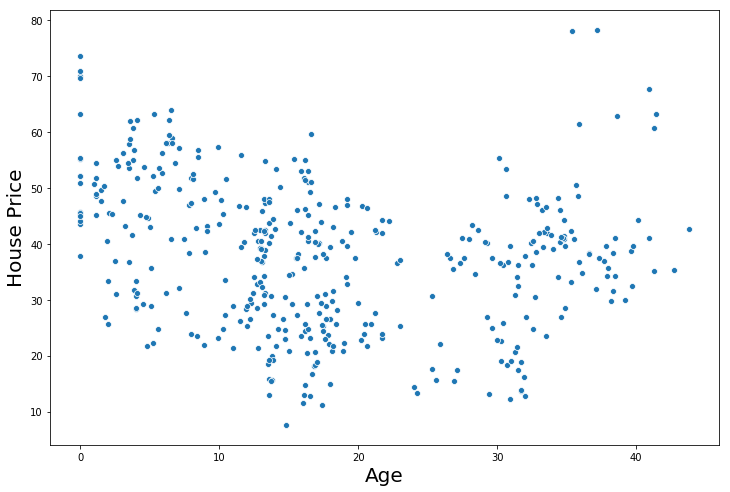

In [85]:
# Import dataset
data = pd.read_csv("../data/Real estate valuation data set .csv",index_col=0)
data = data[['Y house price of unit area','X2 house age']]
data.columns = ['y','x']
data = data[data.y <100] # remove outlier 

print("Number of rows: {}".format(len(data)))

#Plot data 
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(12,8))
sns.scatterplot(y=data['y'],x = data['x'])
plt.xlabel('Age',size=20)
plt.ylabel('House Price',size=20)

plt.savefig('../figures/poly/data_scatter.png',format='png',dpi=150)

## Good Example
Example that has a minimum at n = 2 and the MSE trends are as expected 

In [76]:
x = data['x']
y = data['y']

In [88]:
r=2
train = []
test = []
n = []
for i in range(1,26):
    model, train_mse, test_mse = regression(x,y,i,r)
    train.append(train_mse)
    test.append(test_mse)
    n.append(i)

MSE
___
1) Train:169.72 Test:145.91
2) Train:135.01 Test:127.42
3) Train:134.35 Test:128.1
4) Train:133.5 Test:128.78
5) Train:132.97 Test:128.95
6) Train:132.53 Test:131.48
7) Train:131.79 Test:131.81
8) Train:127.93 Test:133.88
9) Train:126.86 Test:135.36
10) Train:126.77 Test:134.46
11) Train:125.16 Test:140.46
12) Train:124.38 Test:139.51
13) Train:123.0 Test:145.05
14) Train:121.15 Test:148.6
15) Train:119.47 Test:148.18
16) Train:119.37 Test:146.5
17) Train:118.62 Test:150.51
18) Train:118.57 Test:148.97
19) Train:117.79 Test:147.65
20) Train:117.73 Test:147.54
21) Train:116.58 Test:145.83
22) Train:111.25 Test:159.43
23) Train:109.87 Test:160.78
24) Train:109.17 Test:156.95
25) Train:109.15 Test:157.56


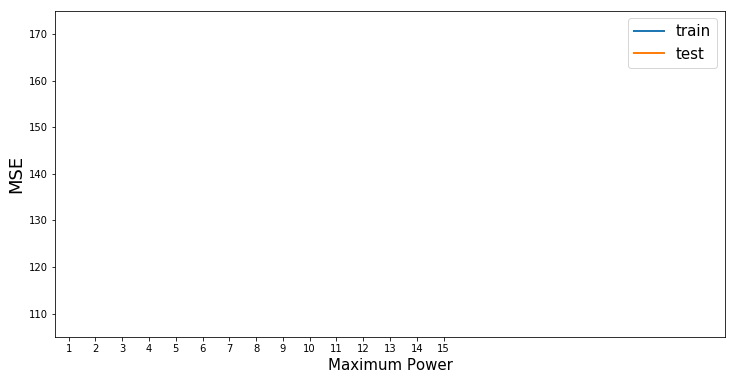

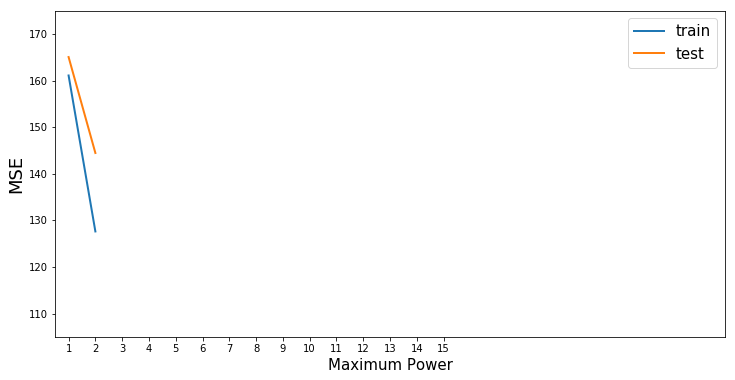

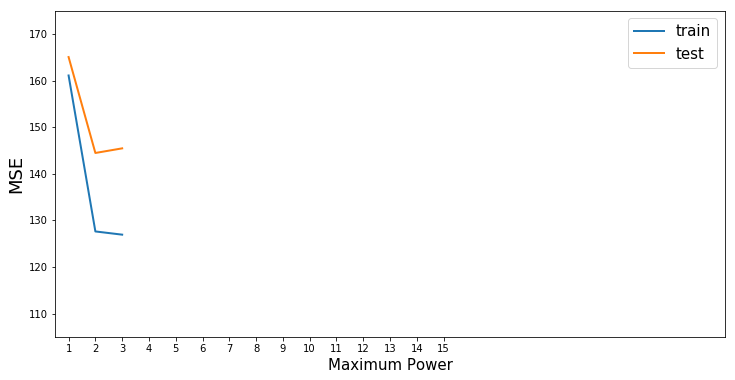

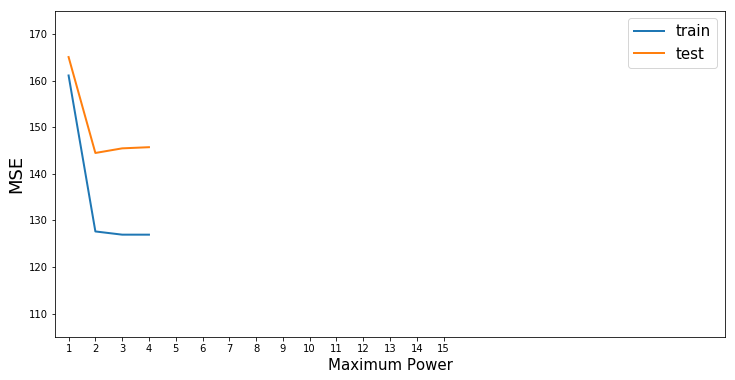

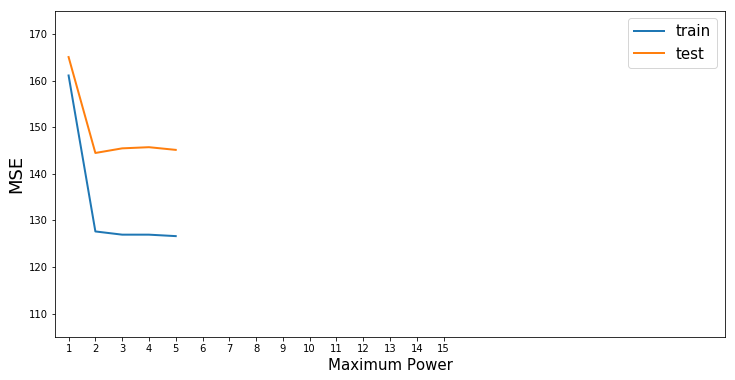

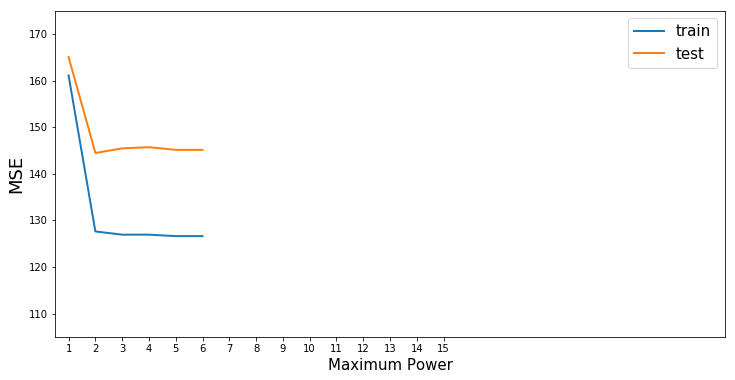

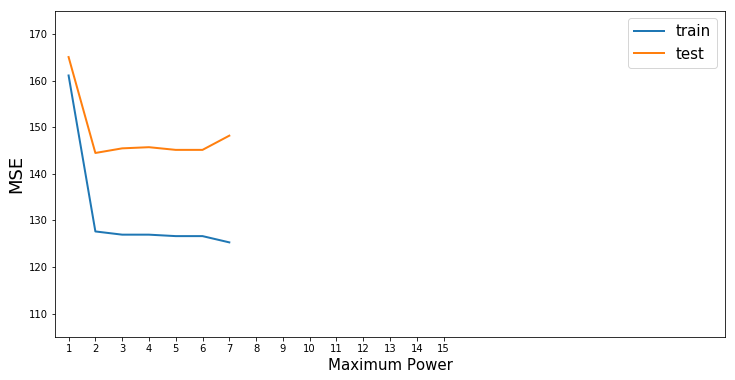

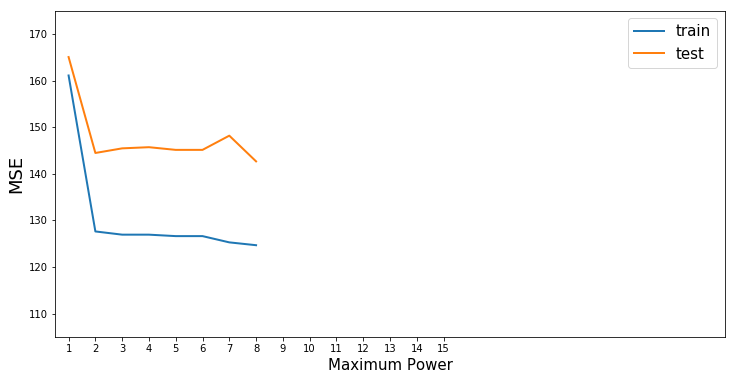

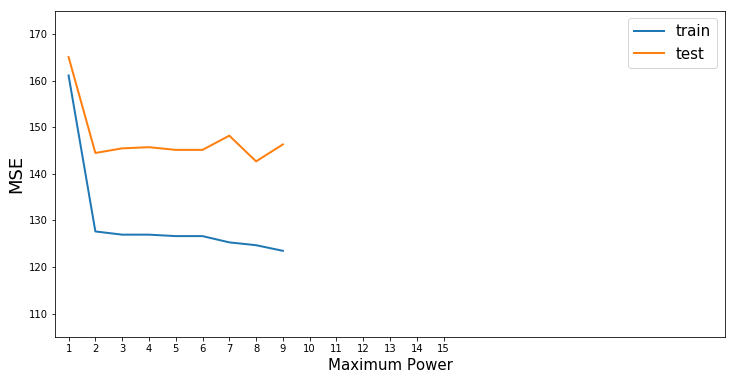

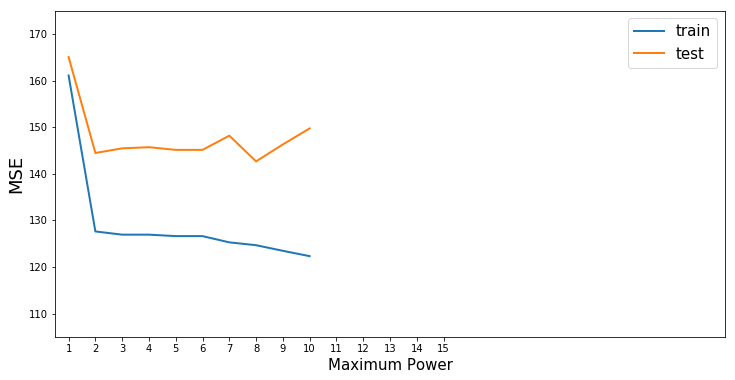

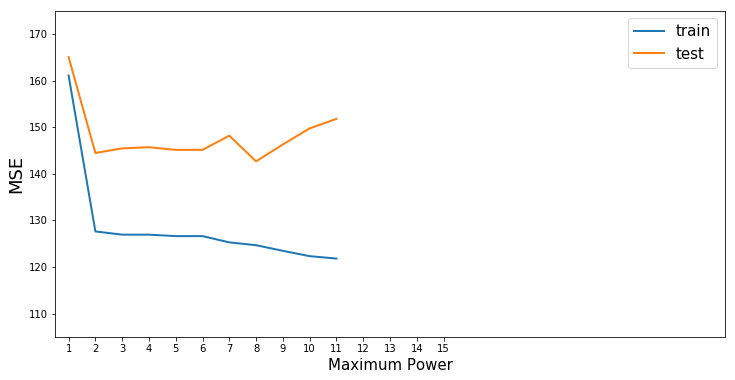

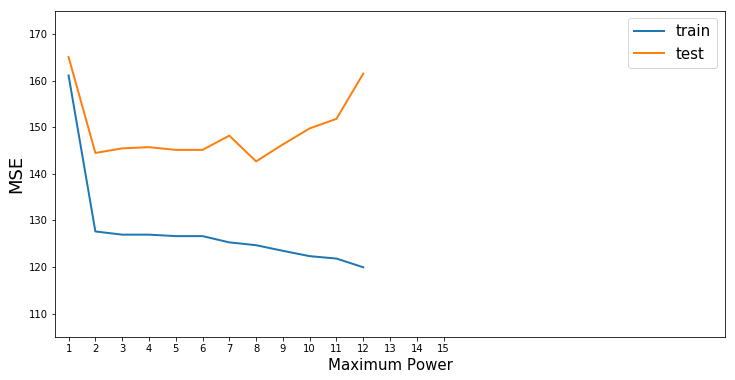

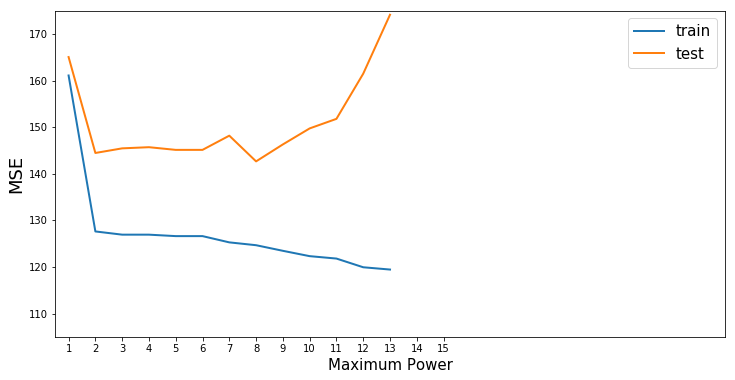

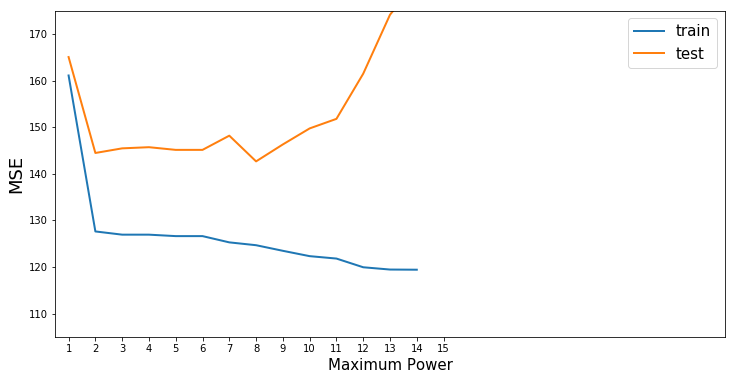

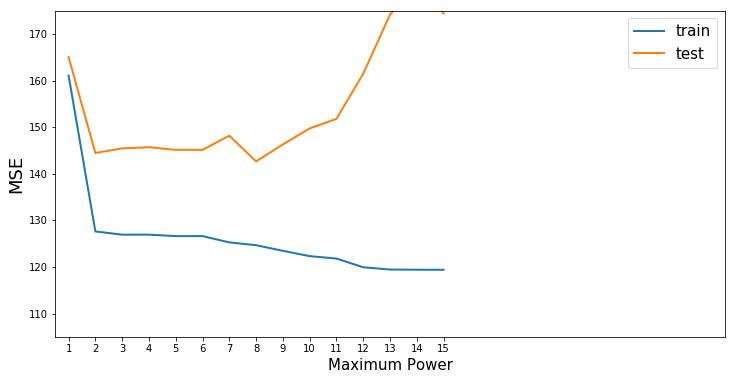

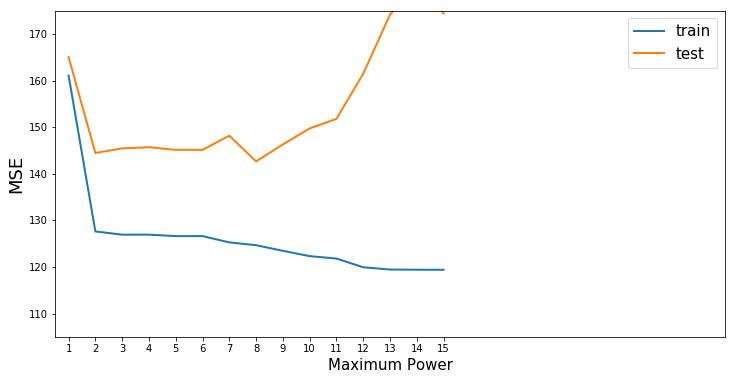

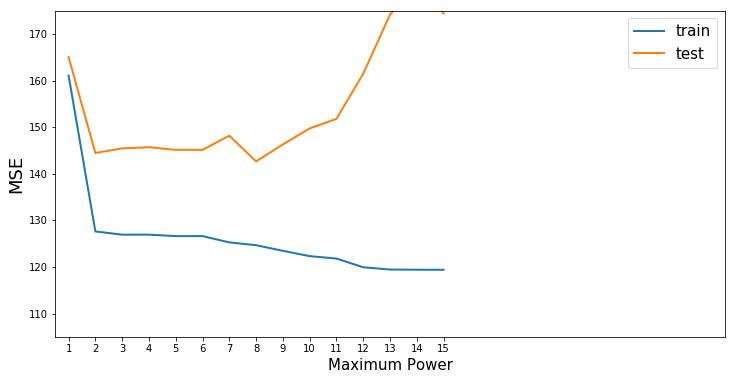

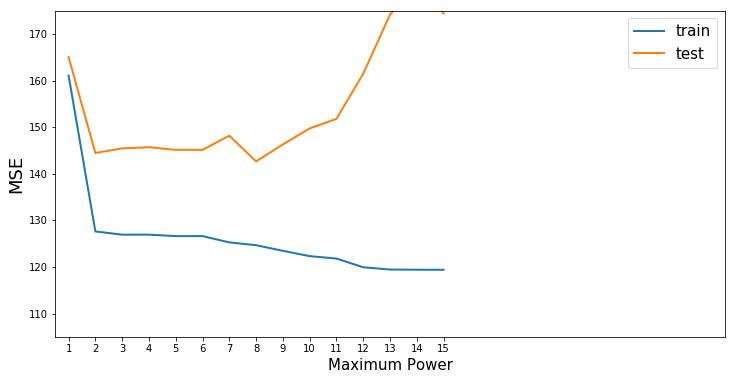

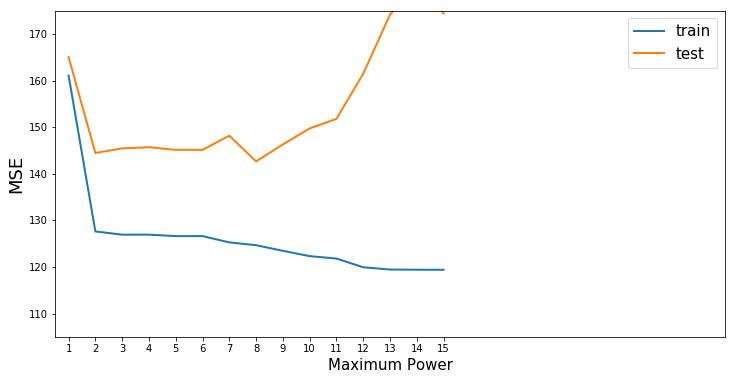

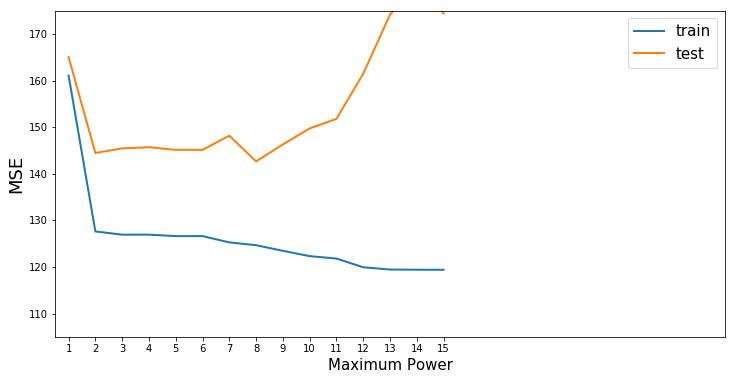

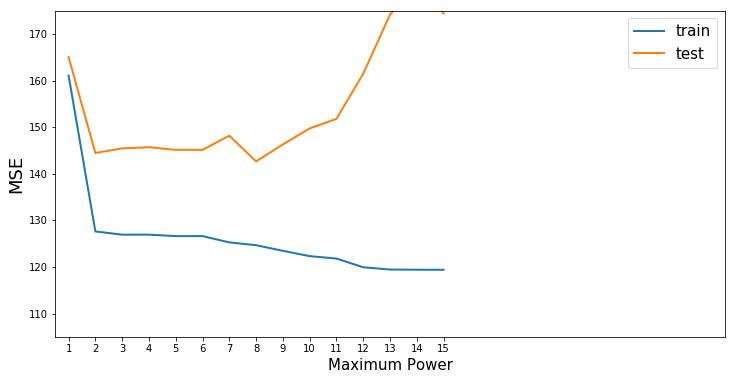

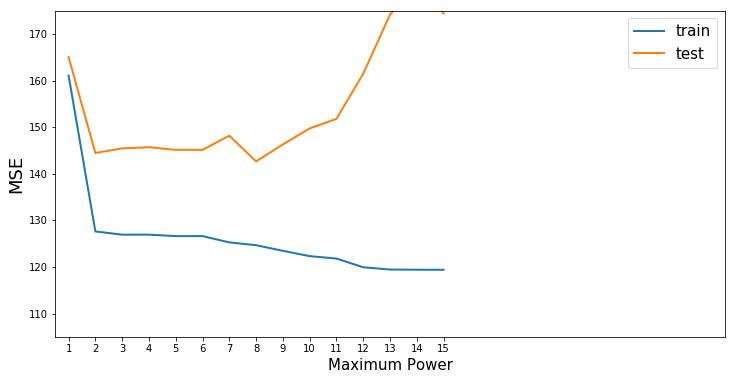

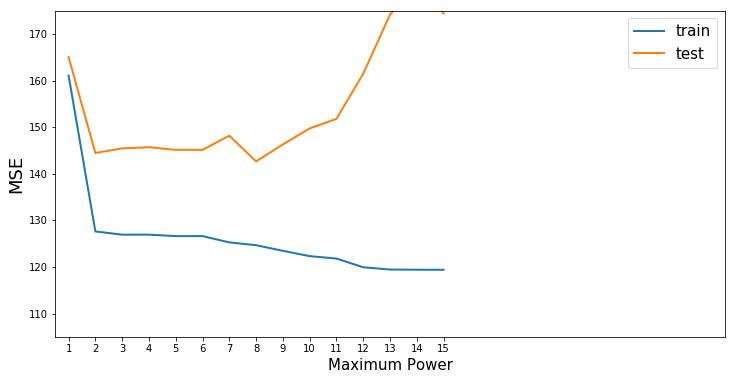

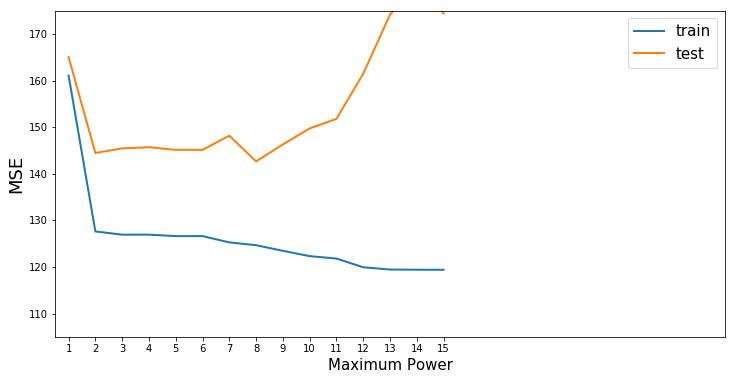

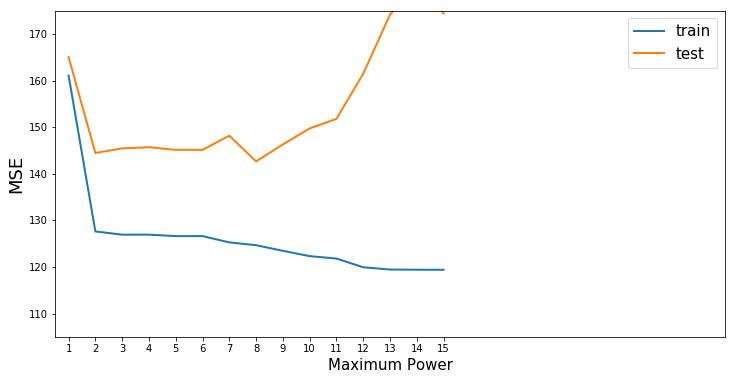

In [140]:
for i in range(1,26):
    fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(12,6))
    plt.plot(n[0:i],train[0:i],label='train', lw=2)   
    plt.plot(n[0:i],test[0:i],label='test', lw=2)  

    plt.ylabel("MSE",size=18)
    plt.xlabel("Maximum Power",size=15)
    plt.xlim(0.5,25.5)
    plt.ylim(105,175)
    plt.xticks(n)

    plt.legend(prop={'size': 15})

    plt.savefig('../figures/poly/mse{}.png'.format(i),format='png',dpi=150)   

## Bad Example
Example used to show why you shouldn't rely on rules 

In [ ]:
15

MSE
___
1) Train:161.08 Test:165.04
2) Train:127.61 Test:144.45
3) Train:126.92 Test:145.44
4) Train:126.92 Test:145.69
5) Train:126.61 Test:145.12
6) Train:126.61 Test:145.12
7) Train:125.27 Test:148.17
8) Train:124.66 Test:142.65
9) Train:123.46 Test:146.29
10) Train:122.31 Test:149.72
11) Train:121.79 Test:151.77
12) Train:119.92 Test:161.47
13) Train:119.43 Test:174.12
14) Train:119.4 Test:181.23
15) Train:119.38 Test:174.39


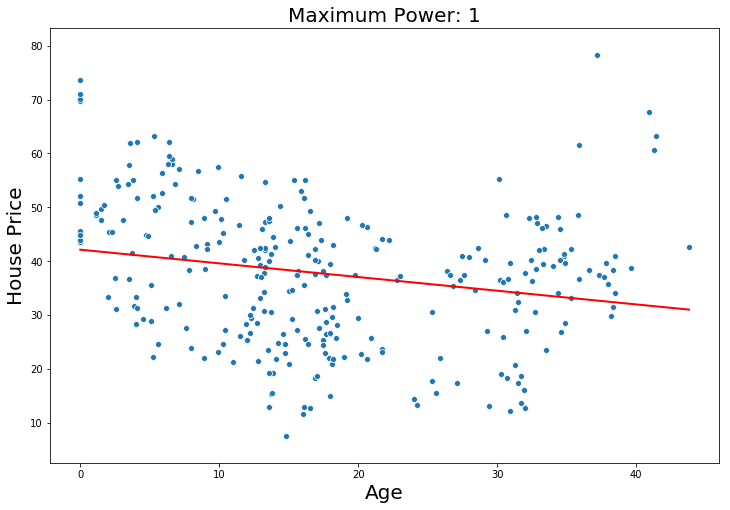

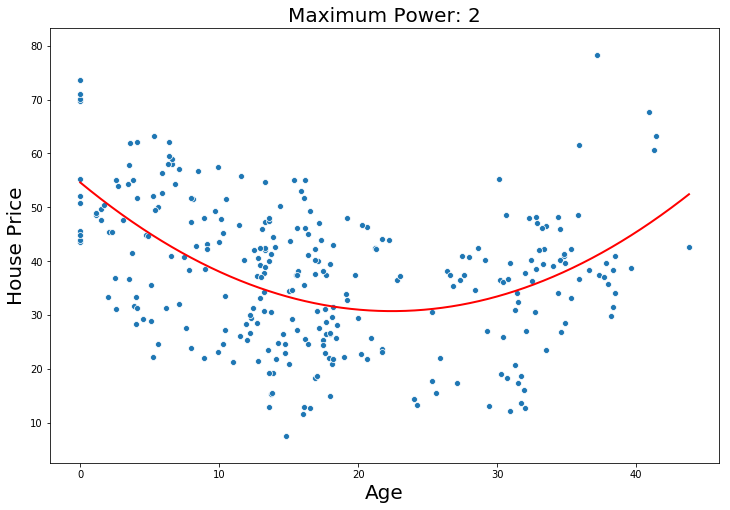

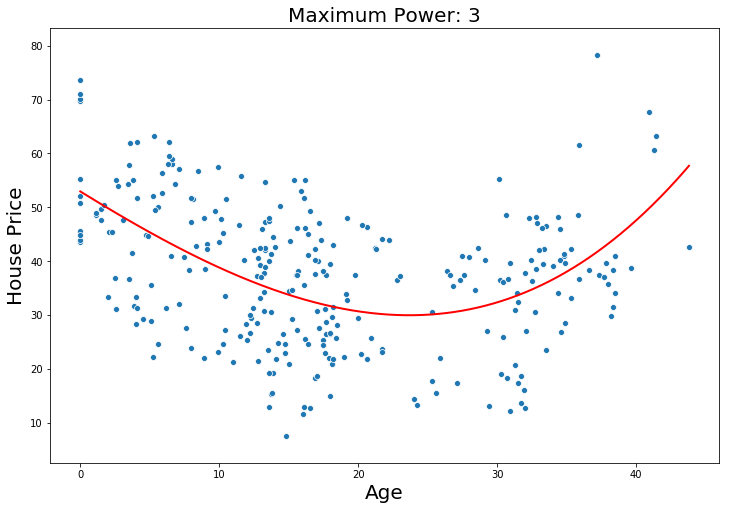

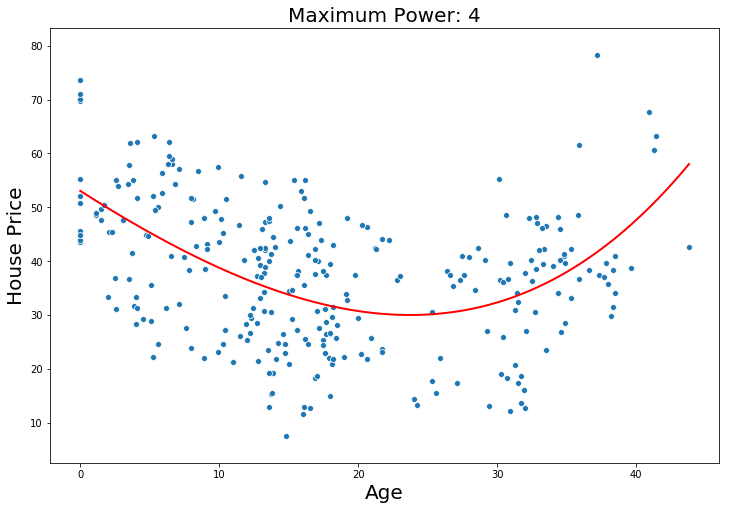

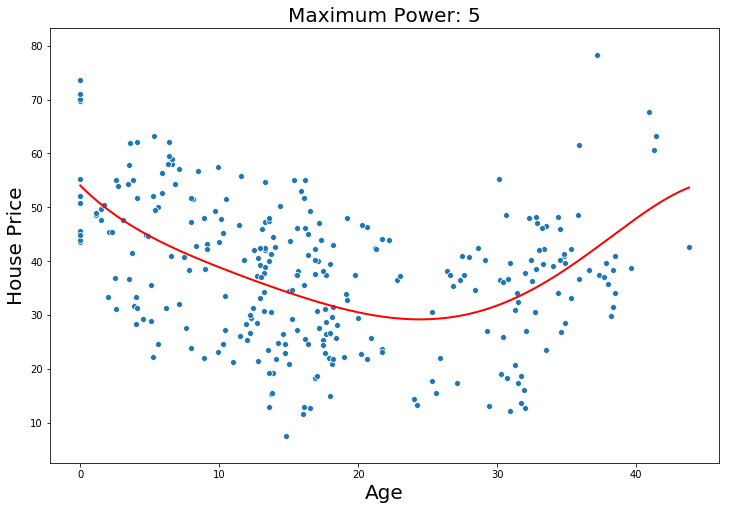

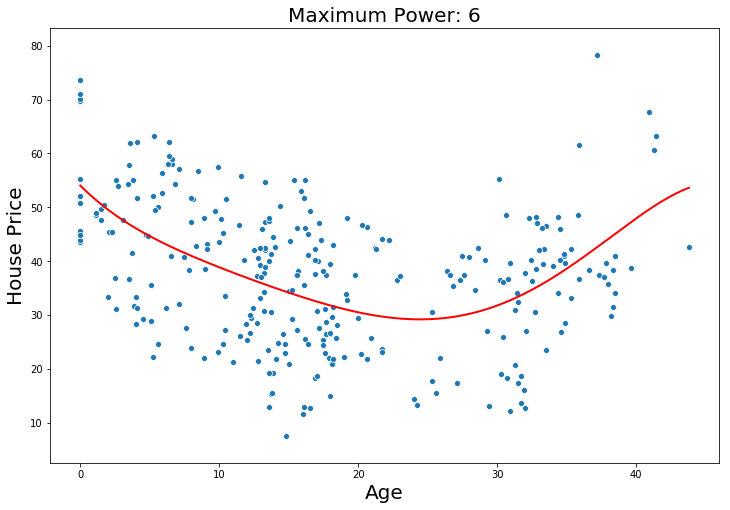

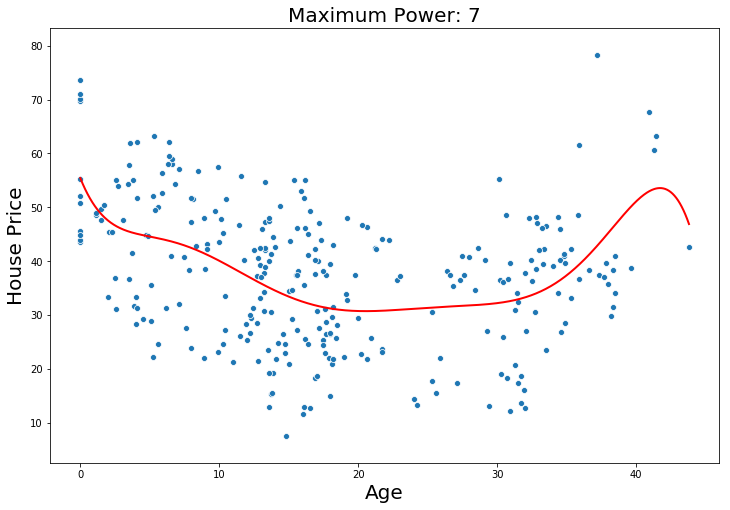

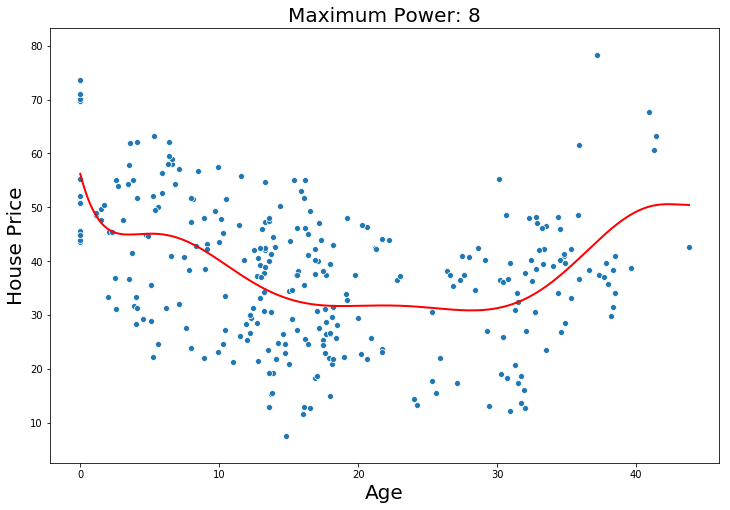

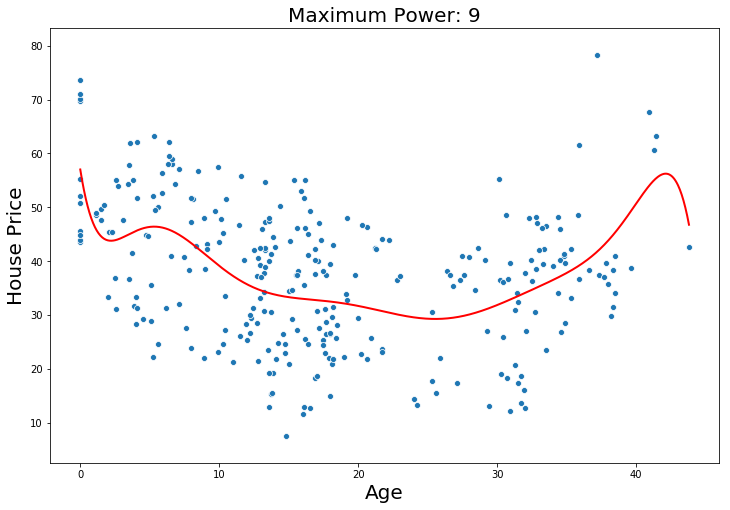

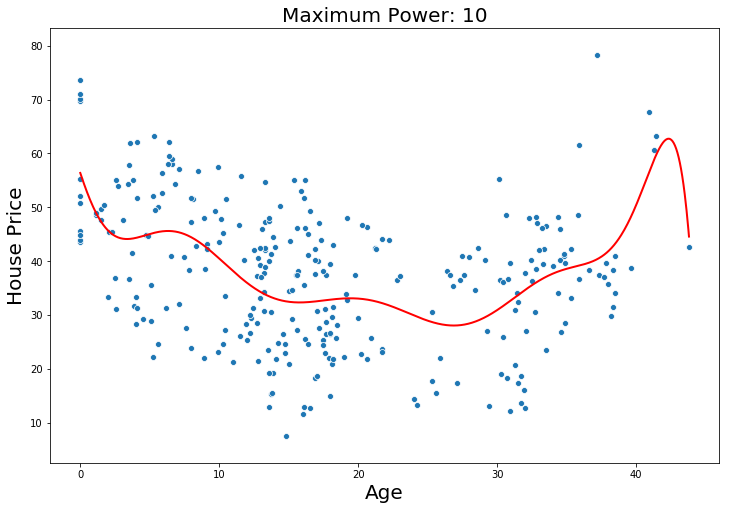

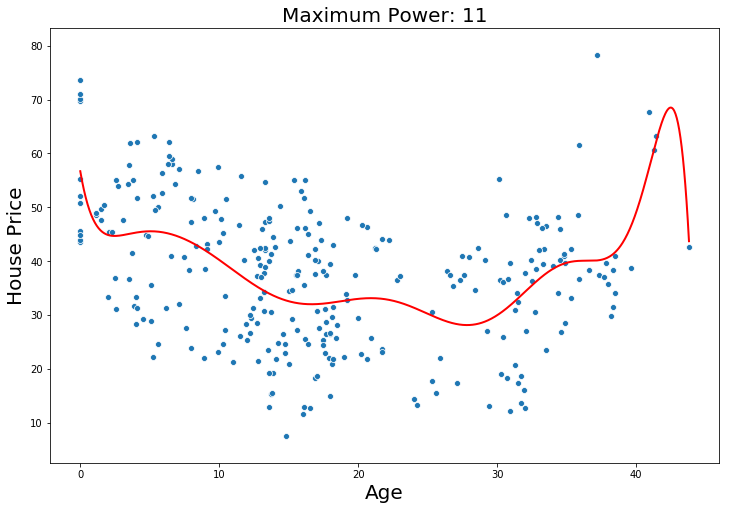

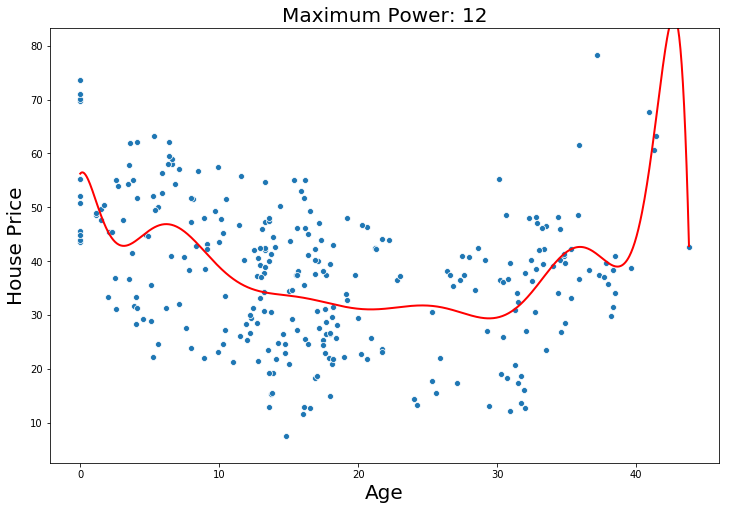

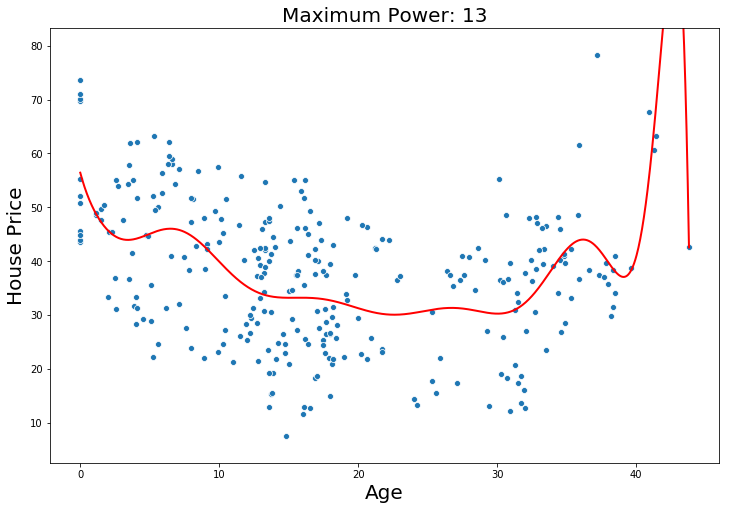

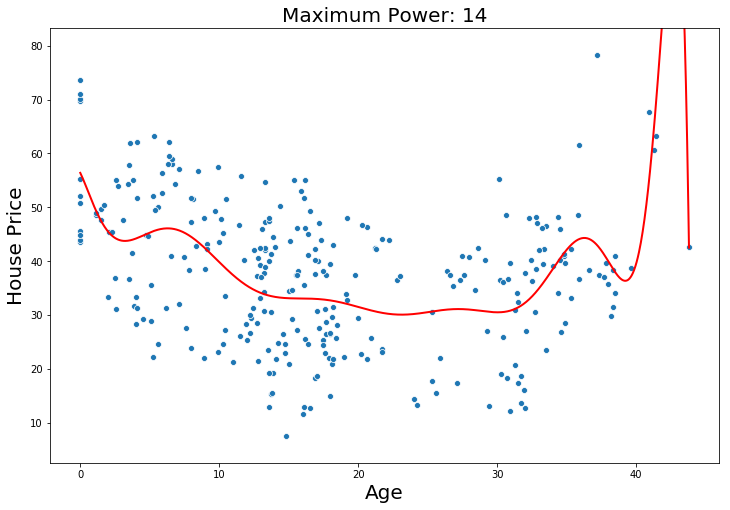

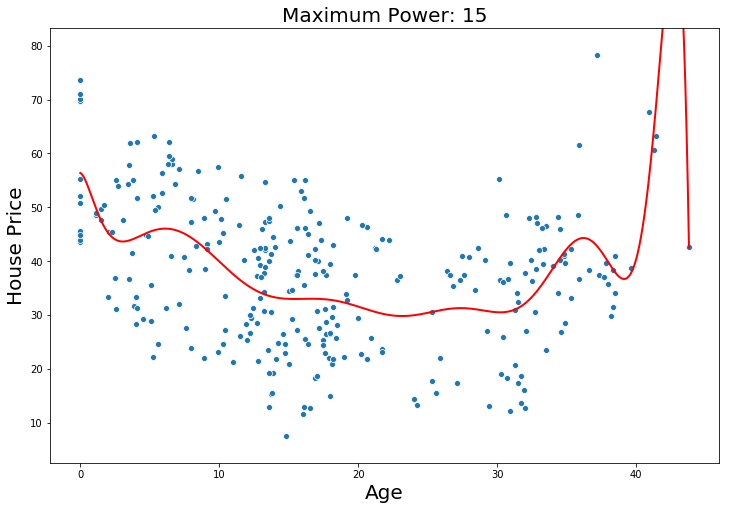

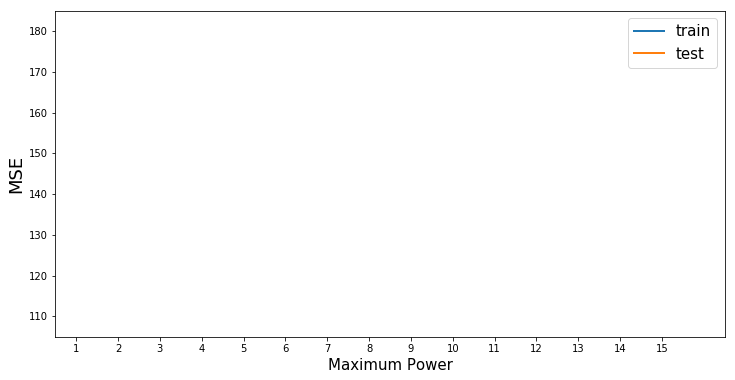

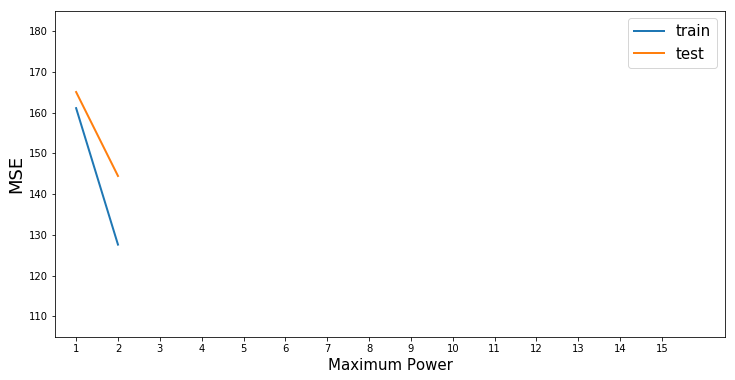

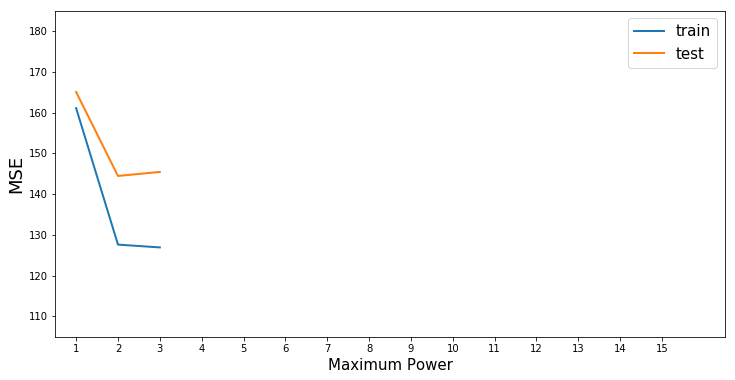

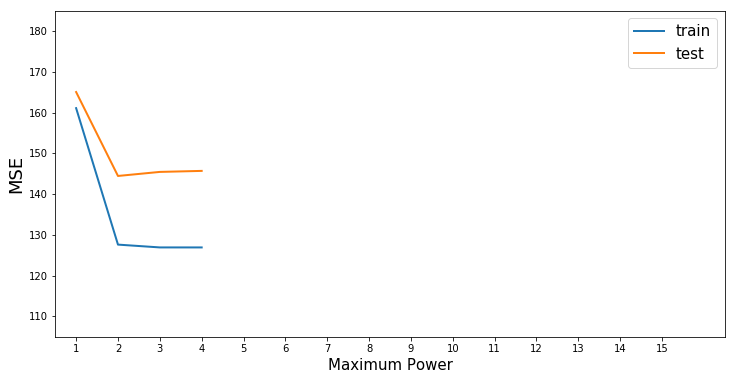

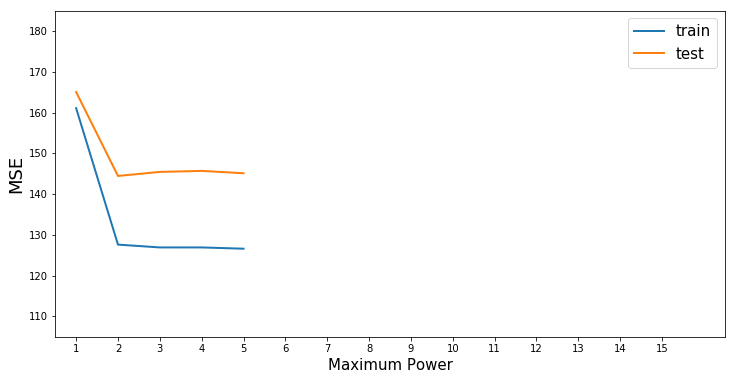

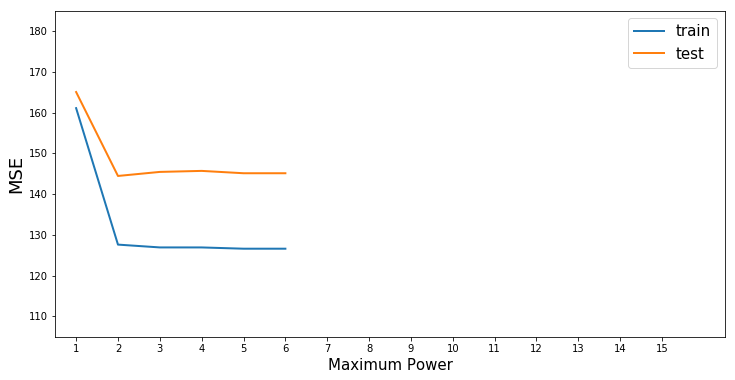

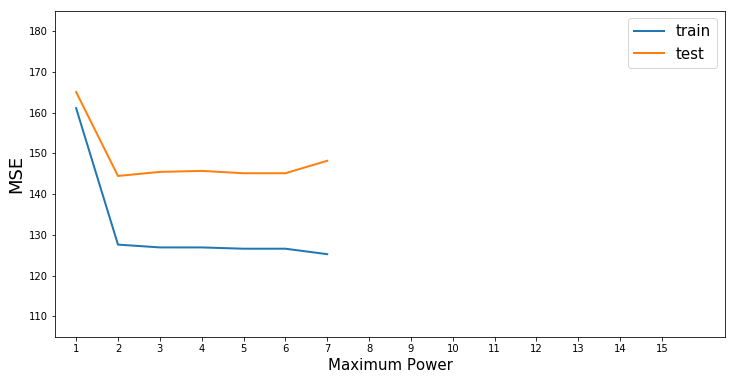

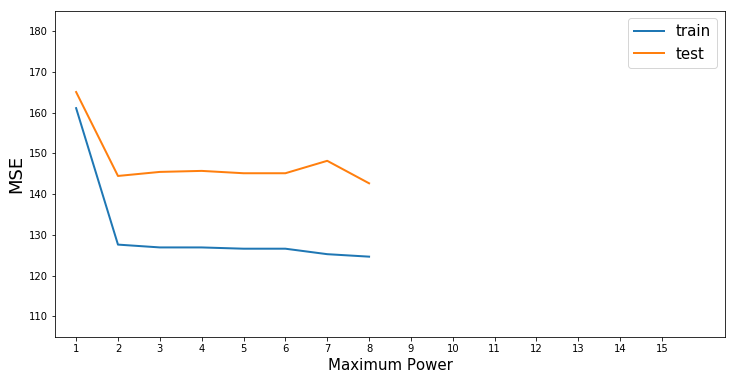

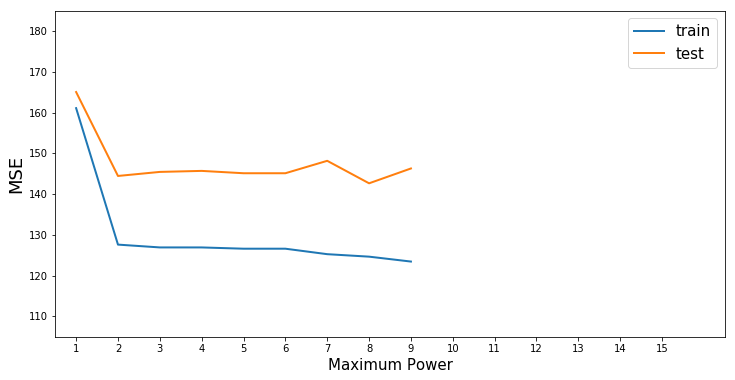

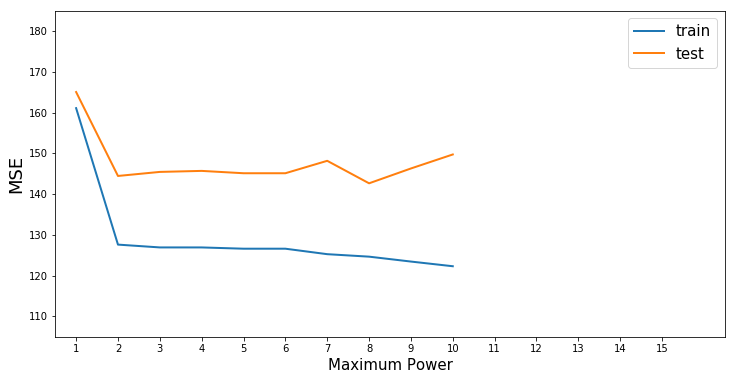

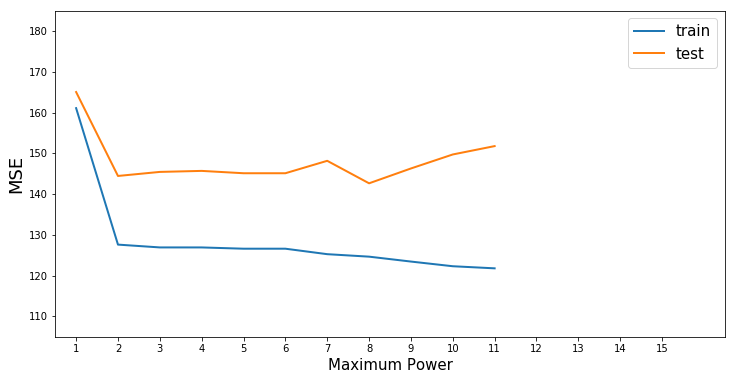

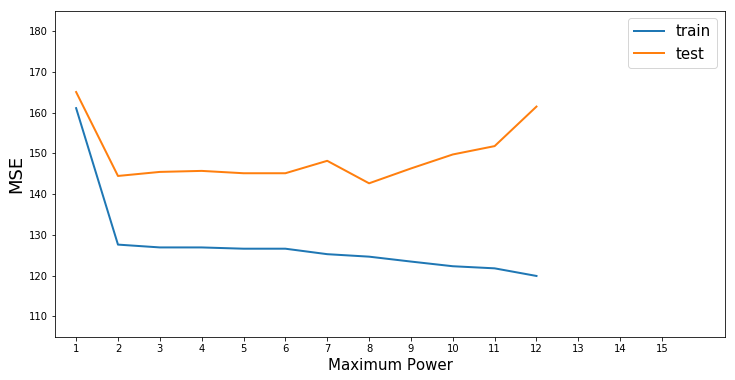

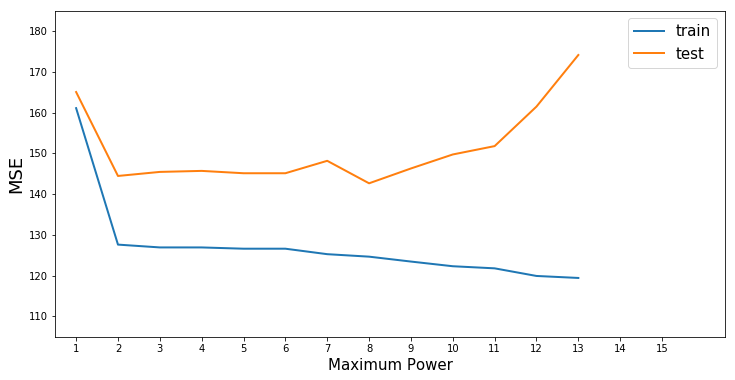

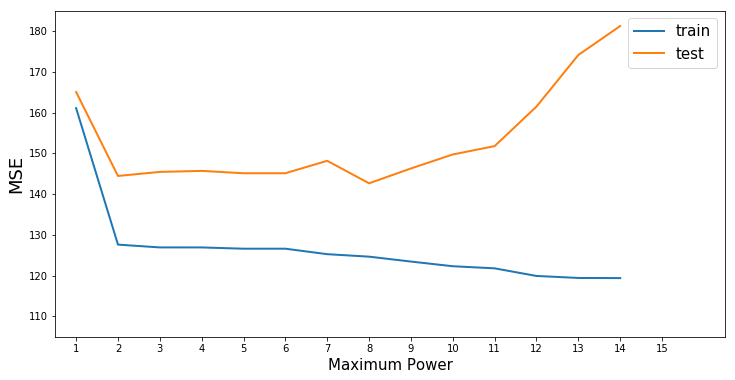

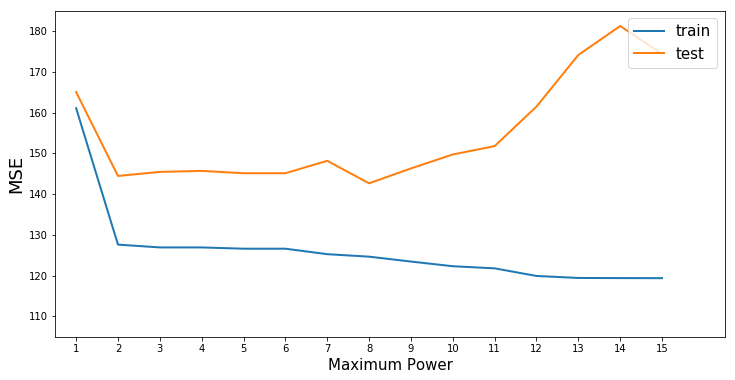

In [142]:
r=22
train = []
test = []
n = []
for i in range(1,16):
    model, train_mse, test_mse = regression(x,y,i,r)
    train.append(train_mse)
    test.append(test_mse)
    n.append(i)
    

for i in range(1,16):
    fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(12,6))
    plt.plot(n[0:i],train[0:i],label='train', lw=2)   
    plt.plot(n[0:i],test[0:i],label='test', lw=2)  

    plt.ylabel("MSE",size=18)
    plt.xlabel("Maximum Power",size=15)
    plt.xlim(0.5,16.5)
    plt.ylim(105,185)
    plt.xticks(n)

    plt.legend(loc =1,prop={'size': 15})

    plt.savefig('../figures/poly/mse{}.png'.format(i),format='png',dpi=150)   

# Code for cover figure 

In [231]:
# Functions
def plot_prediction_cover(y_train,x_train,y_line,x_line):
    """
    Plot the prediction line of a regression model over training data
    """
    
    #plot data
    fig, ax = plt.subplots( nrows=1, ncols=1,figsize=(12,8))
    plt.ylim(min(y_train)-100, max(y_train)+100)
    sns.scatterplot(np.array(x_train)[:,1],y_train)

    #plot prediciton line        
    plt.plot(x_line['x'],y_line, 'r-', lw=2)
    
    # Hide grid lines
    ax.grid(False)

    # Hide axes ticks
    ax.set_xticks([])
    ax.set_yticks([])
    plt.axis('off')
    
    plt.savefig('../figures/poly/pred_line{}.png'.format(i),format='png',dpi=150)
    
def regression(x,y,n,r=101):
    
    """
    Construct polynomial regression model with maximum power = n and create summary plots
    """
    x = sm.add_constant(x)
    
    #Prediction line data 
    x_line = np.linspace(min(x['x']), max(x['x']), 1000)
    x_line = pd.DataFrame(data=x_line, columns=["x"])
    x_line  = sm.add_constant(x_line)
    
    for i in range(1,n+1):
        if i != 1:
            x['x{}'.format(i)] = x['x']**i

            x_line['x{}'.format(i)] = x_line['x']**i
     
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state = r)

    #fit model 
    model = sm.OLS(y_train,x_train).fit()
    
    #Predictions
    pred_train = model.predict(x_train)
    pred_test = model.predict(x_test)
    y_line = model.predict(x_line)
    
    #Plots and MSE
    plot_prediction_cover(y_train,x_train,y_line,x_line)
    #plot_fit(y_train,pred_train,y_test,pred_test)
    train_mse, test_mse = MSE(y_train,pred_train,y_test,pred_test)

    
    return model,train_mse, test_mse  

15) Train:37410.5 Test:95604.01


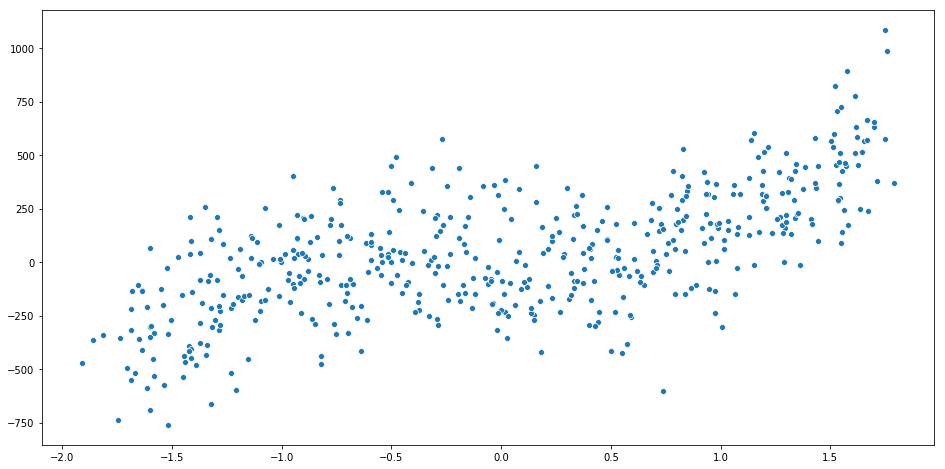

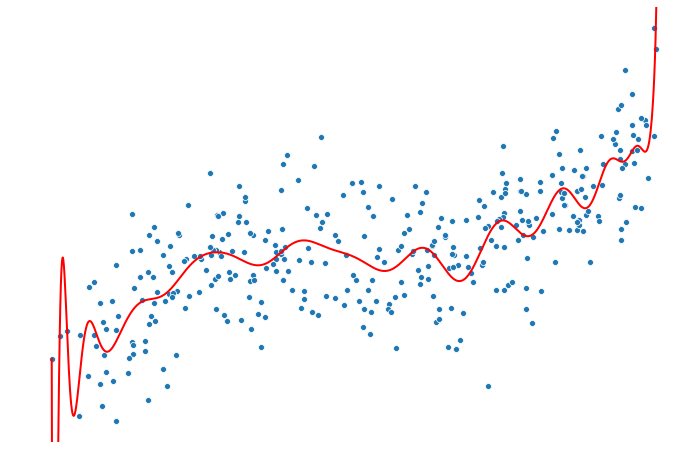

In [289]:
#Generate data
a = 500
x = [round(x,2) for x in np.linspace(-10, 10, a)+ 0.5*np.random.randn(a)]

x = np.array(x)
noise = np.random.randn(a)
#y = -0.5*x**3 + x**2+x+1 + noise
y = 0.5*x**3 + x**2 + 2*x + 1 + 200*noise

x = (x-np.mean(x))/np.std(x)

fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(16,8))
sns.scatterplot(y = y,x = x)

data = pd.DataFrame(data=x, columns=["x"])
data['y'] = y

x = data['x']
y = data['y']

model, train_mse, test_mse = regression(x,y,35)

15) Train:52962.57 Test:57467.59


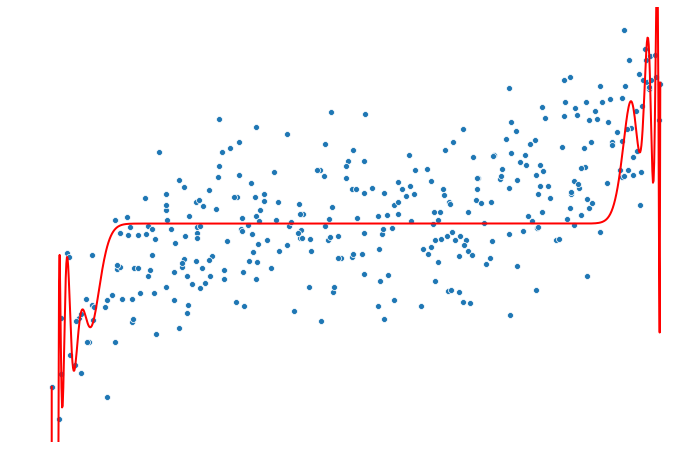

MSE
___
1) Train:47263.33 Test:50069.83
2) Train:46901.04 Test:48384.36
3) Train:40098.6 Test:39443.12
4) Train:40074.2 Test:39458.94
5) Train:39512.99 Test:40015.45
6) Train:39512.75 Test:40055.49
7) Train:39456.98 Test:40937.03
8) Train:39456.96 Test:40944.98
9) Train:39451.96 Test:40897.03
10) Train:39333.98 Test:40772.92
11) Train:39233.88 Test:41320.74
12) Train:39222.64 Test:41341.65
13) Train:39193.85 Test:41138.32
14) Train:39174.74 Test:41291.6
15) Train:39174.55 Test:41305.64
16) Train:39113.57 Test:40456.57
17) Train:38991.87 Test:40720.91
18) Train:38729.79 Test:42536.73
19) Train:38661.5 Test:42167.45
20) Train:38276.09 Test:39457.34
21) Train:38262.32 Test:39763.98
22) Train:38225.76 Test:39423.21
23) Train:37588.51 Test:44308.48
24) Train:37324.55 Test:42585.66
25) Train:37253.25 Test:40815.43
26) Train:37235.49 Test:40442.7
27) Train:37180.15 Test:40086.79
28) Train:37179.01 Test:39619.44
29) Train:37171.13 Test:40083.61
30) Train:37168.29 Test:40176.47
31) Train:37167.

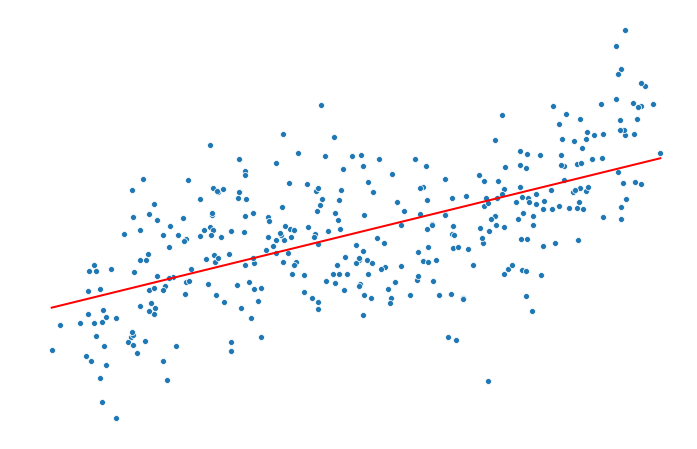

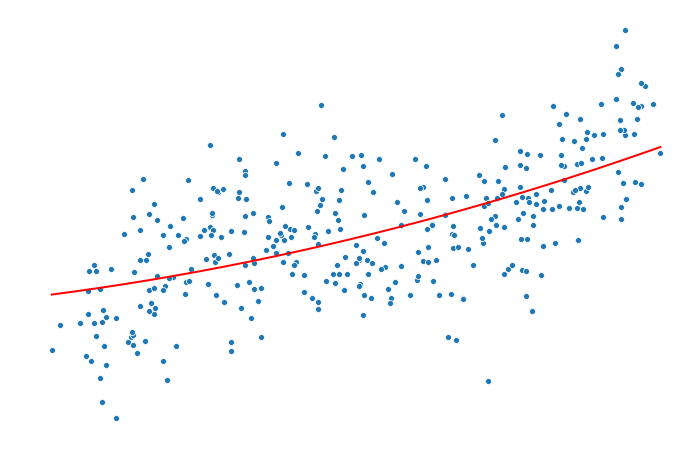

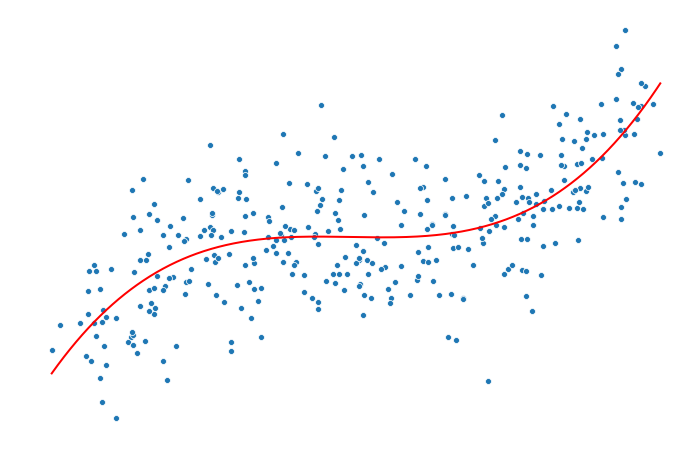

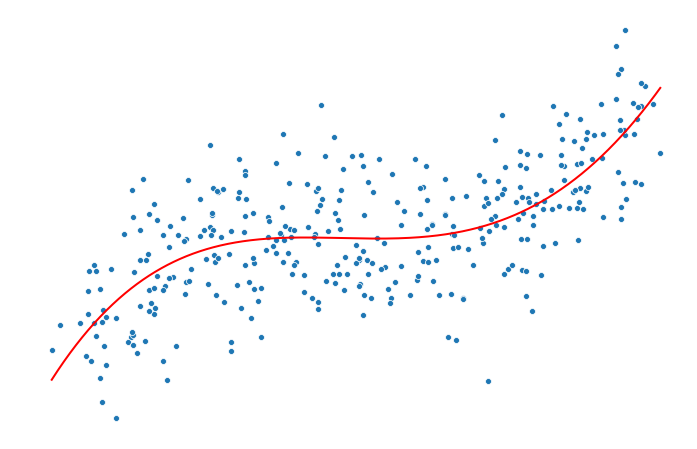

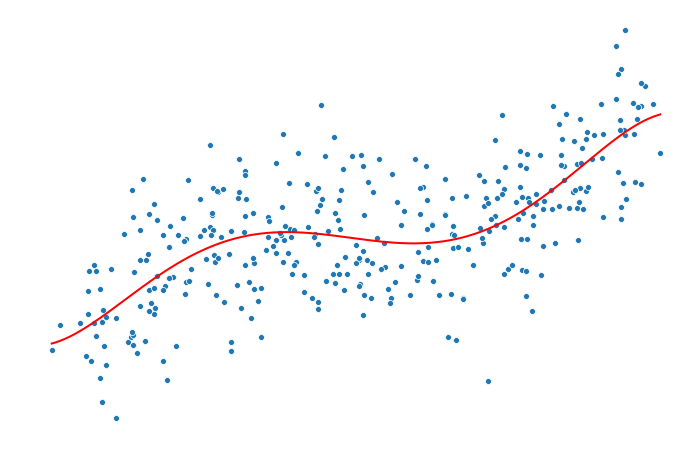

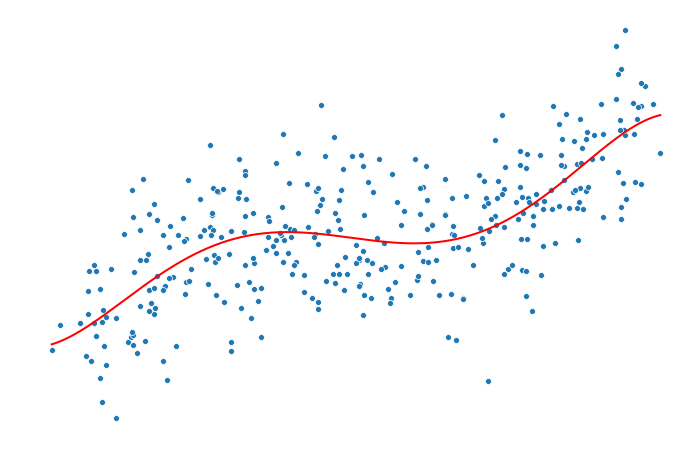

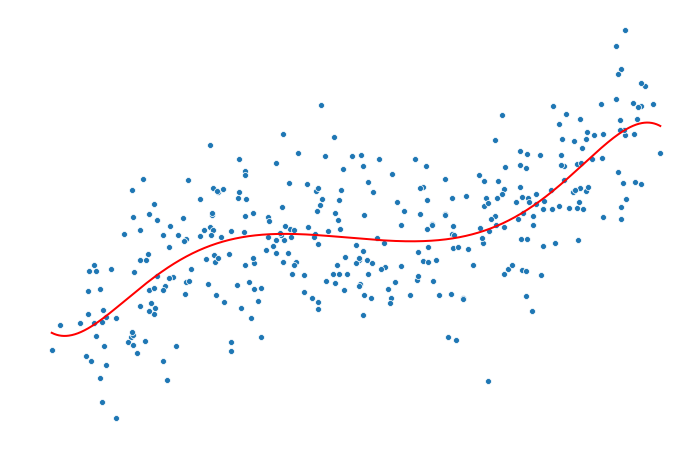

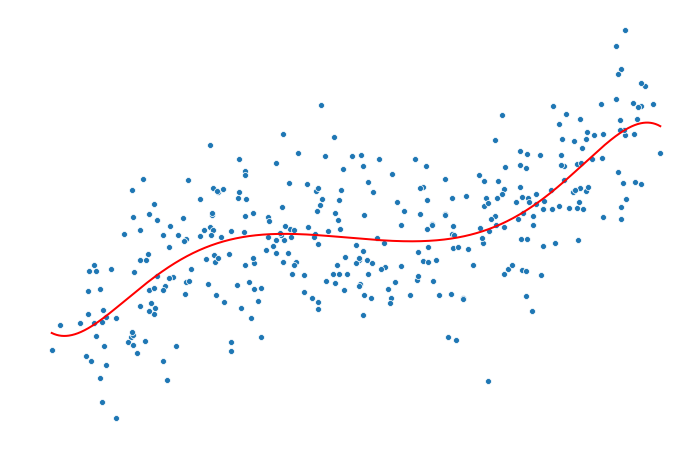

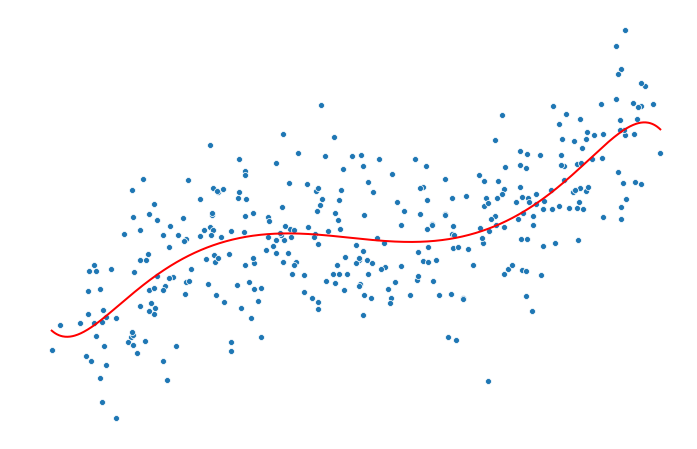

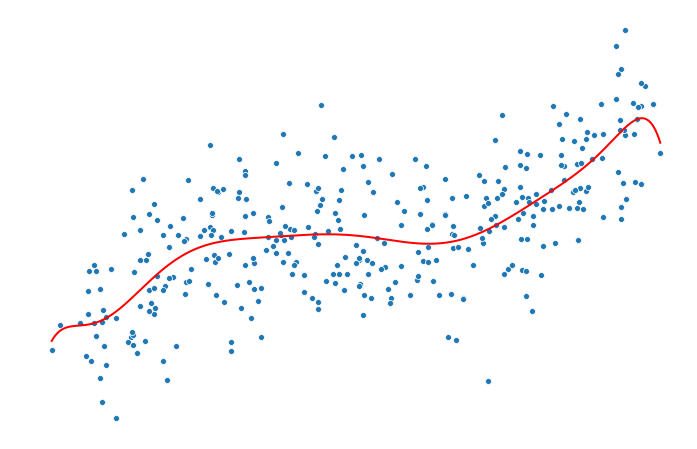

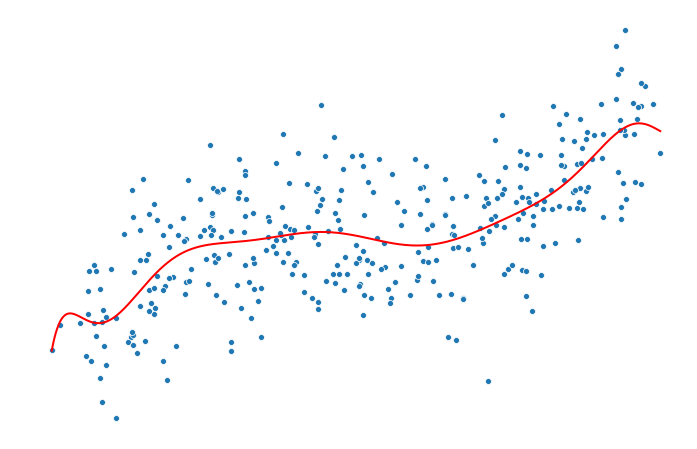

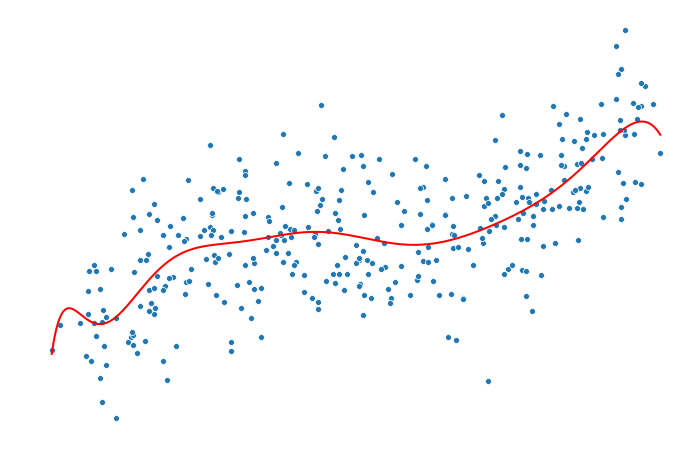

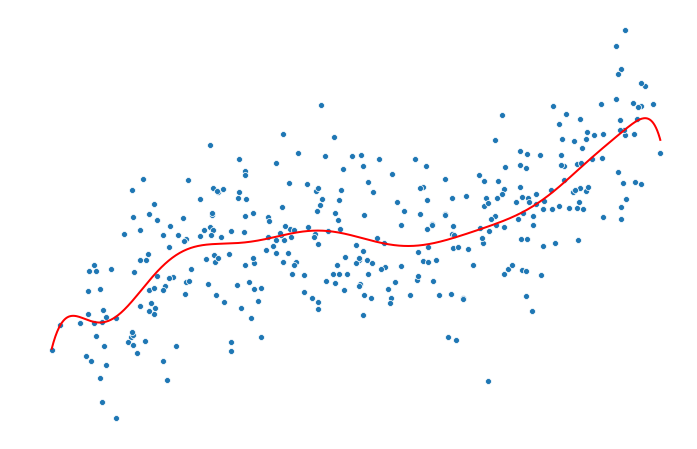

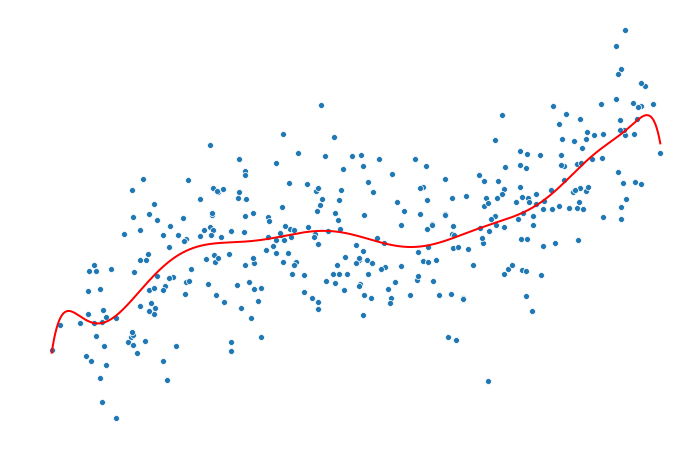

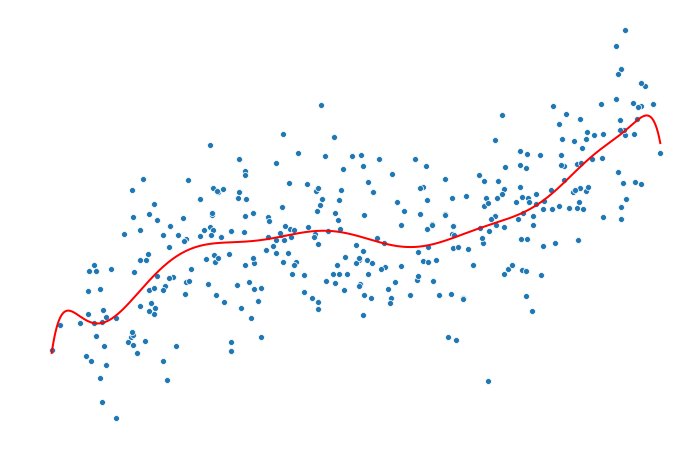

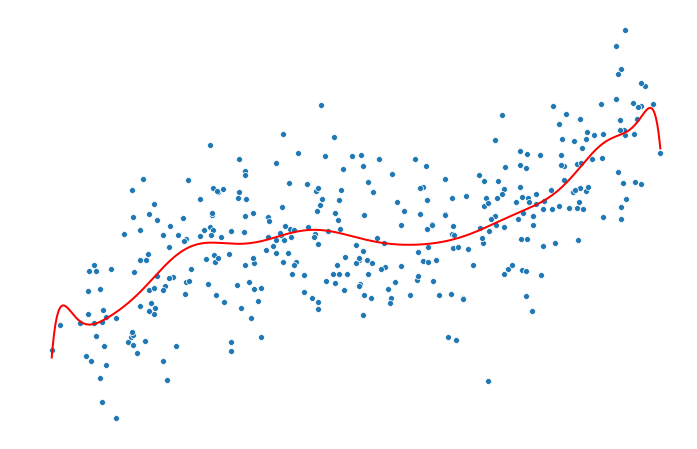

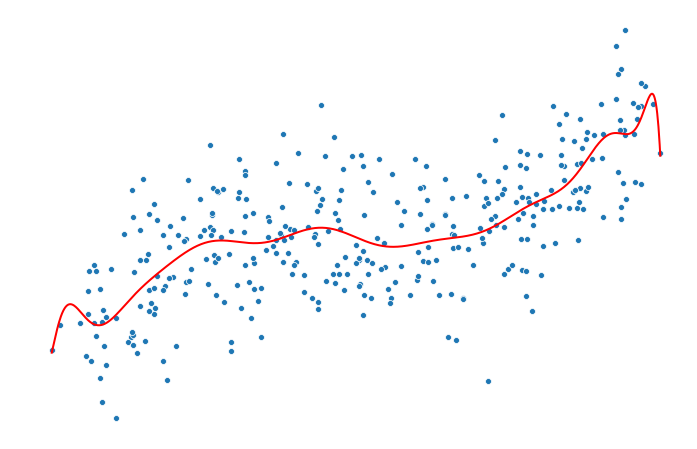

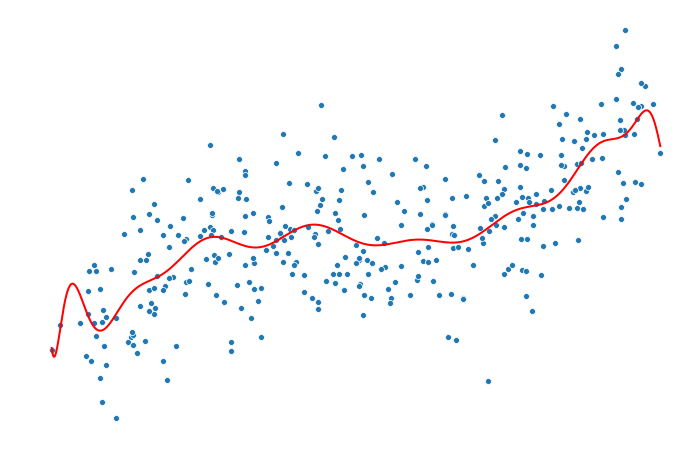

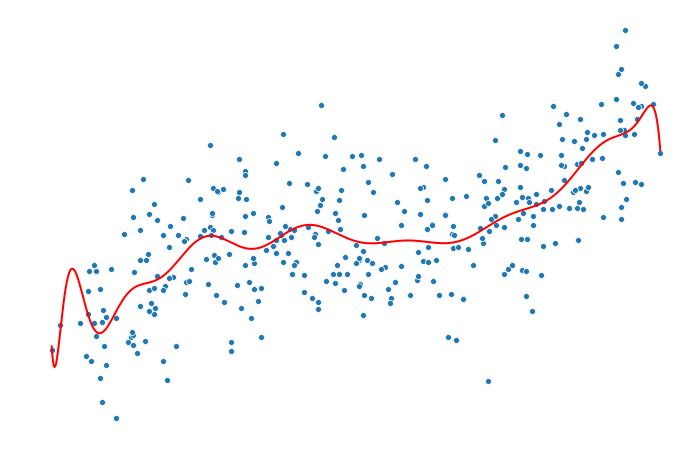

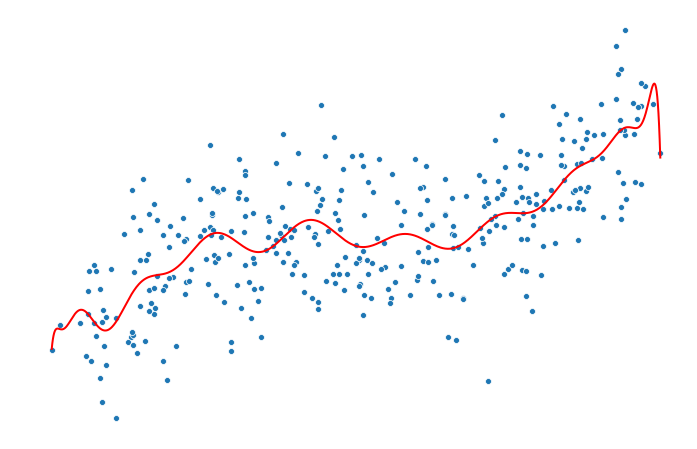

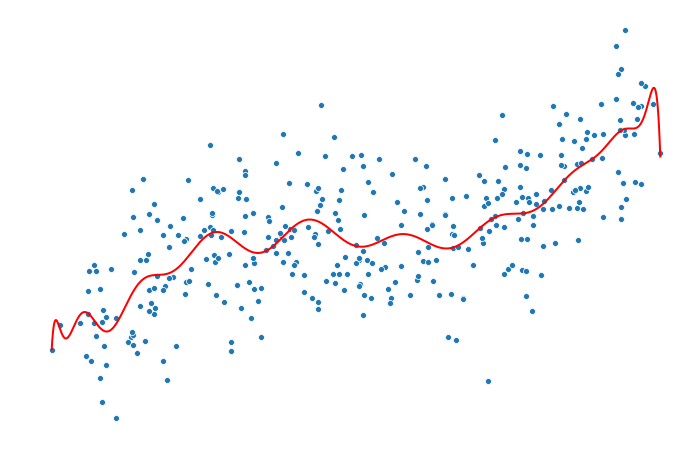

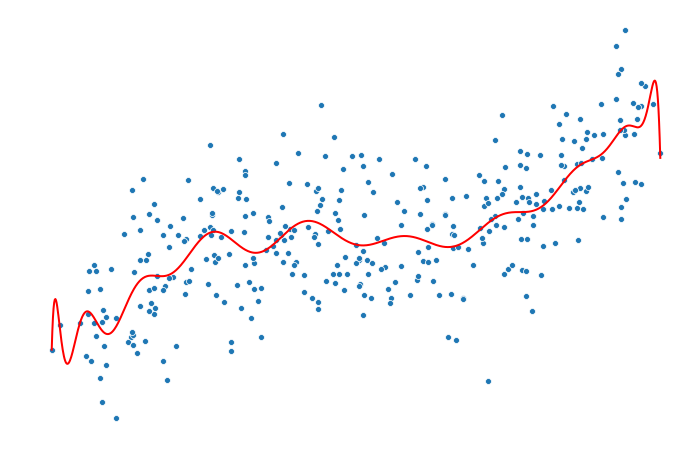

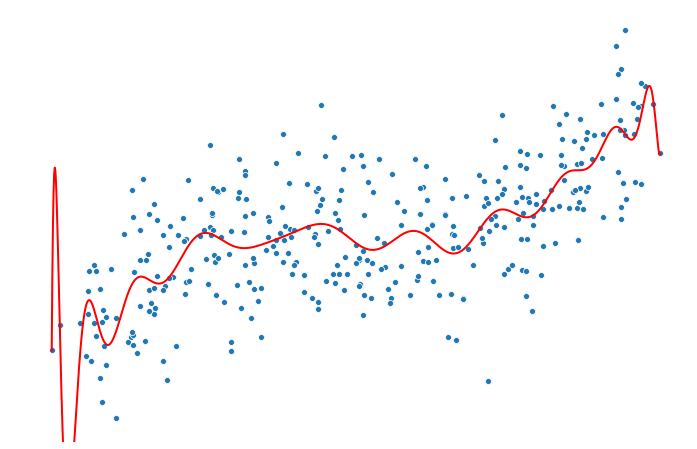

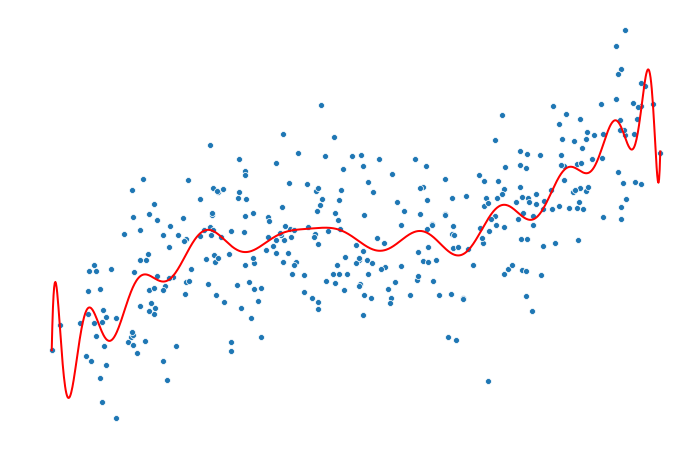

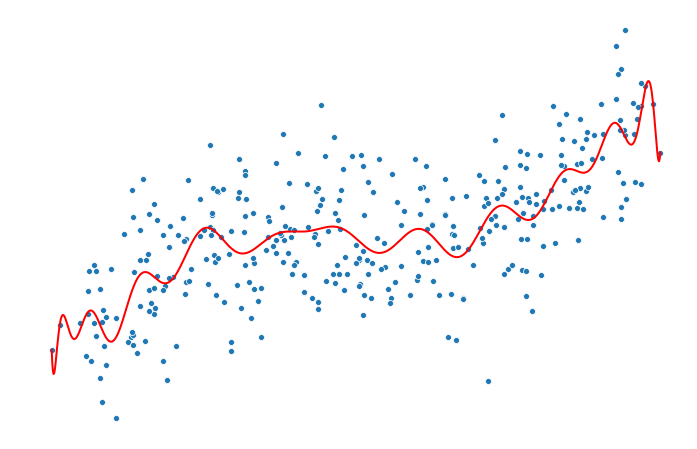

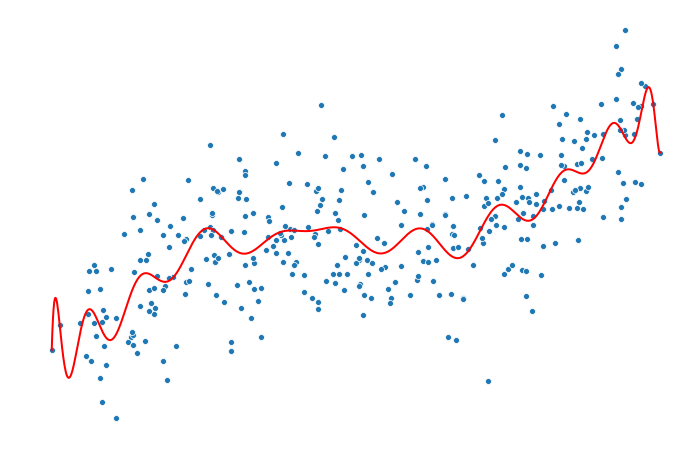

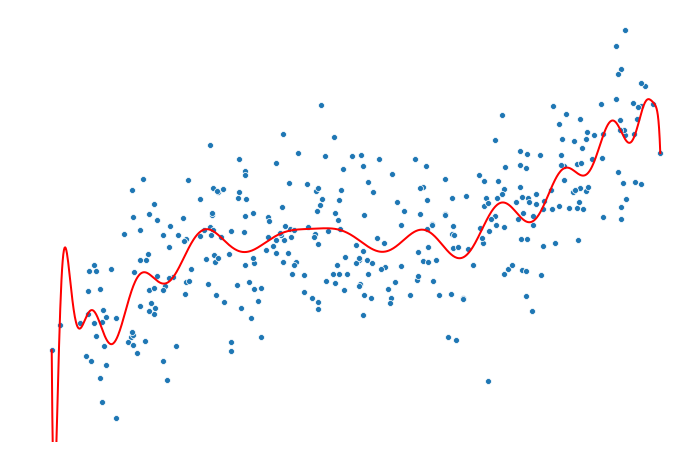

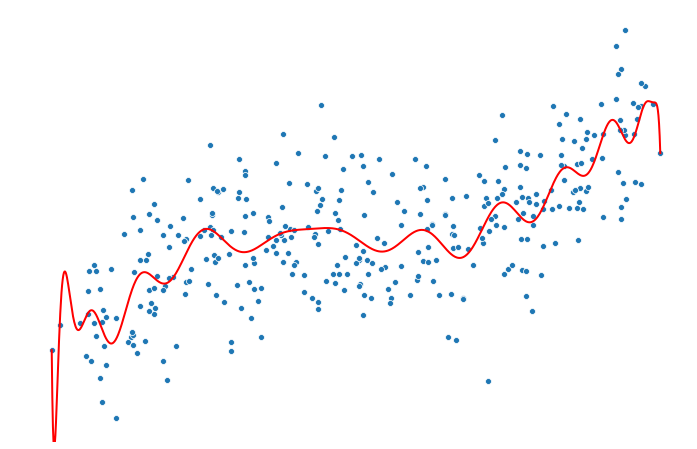

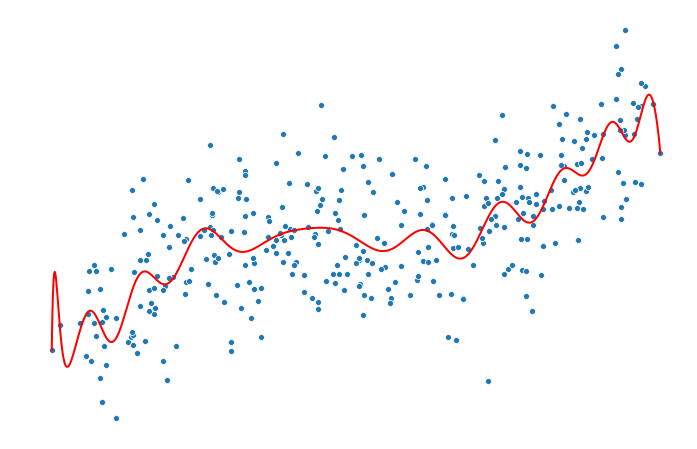

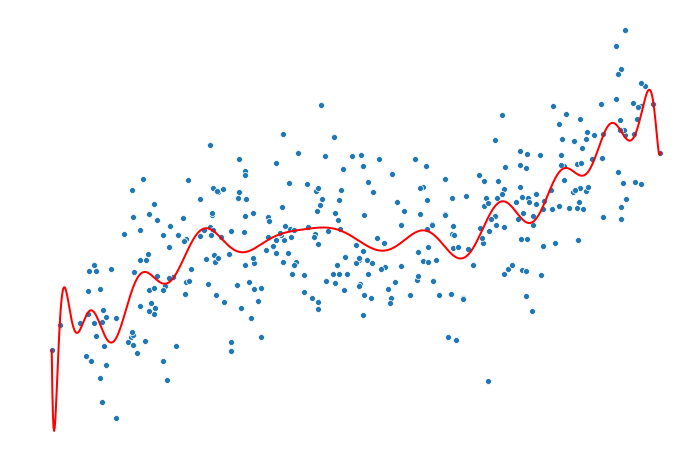

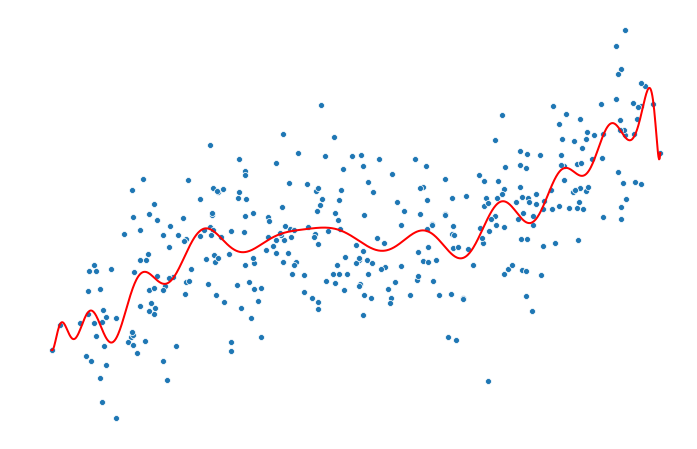

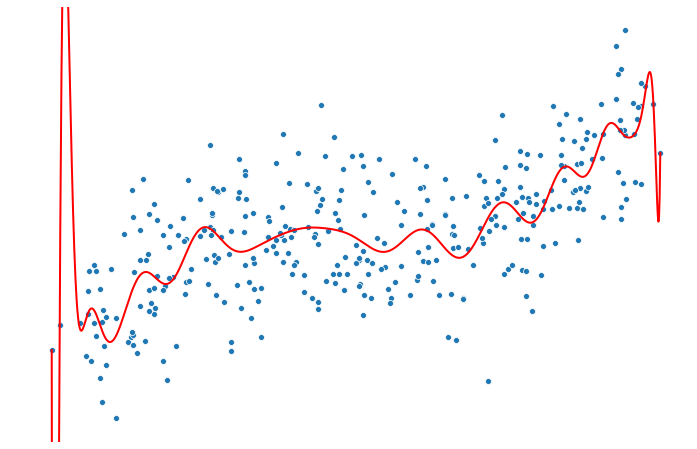

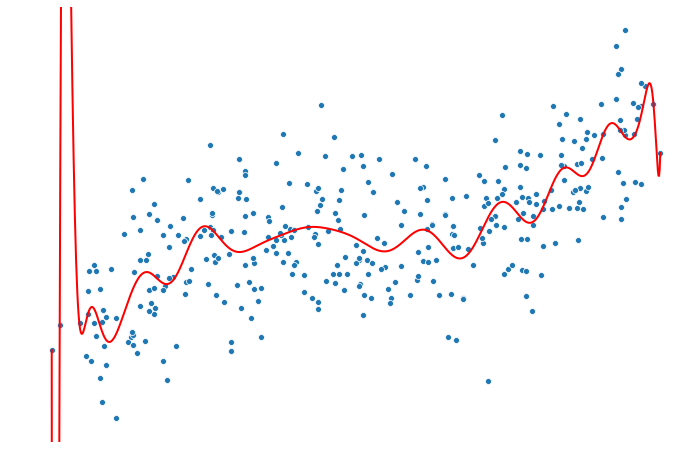

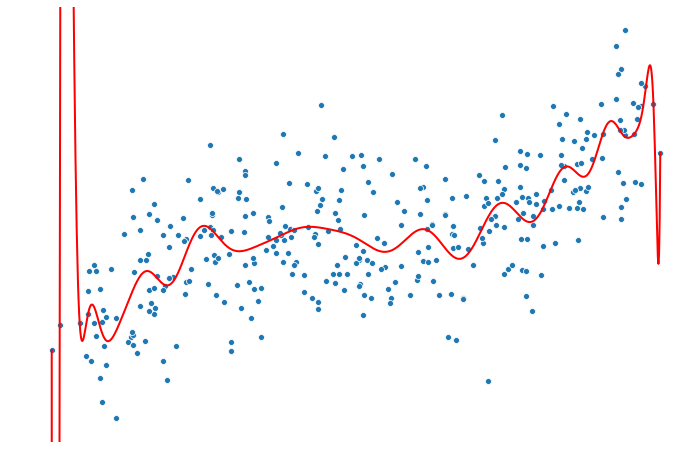

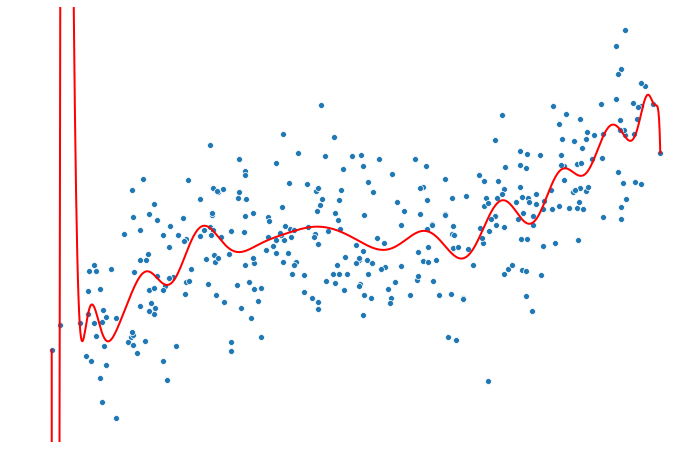

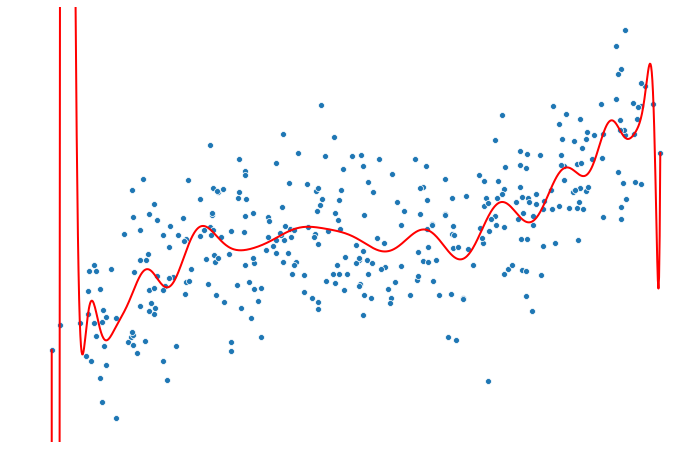

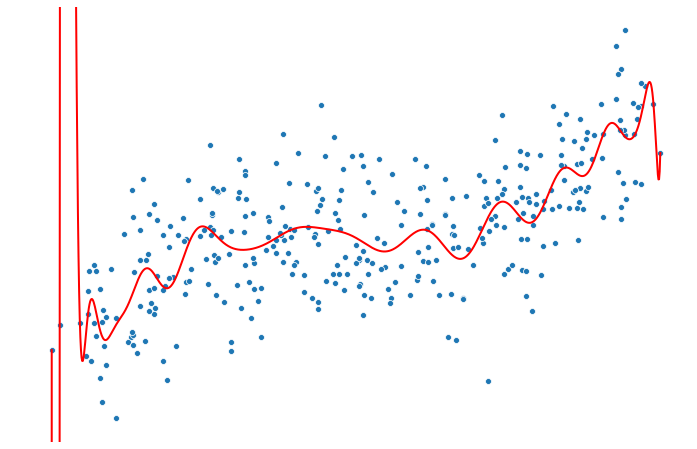

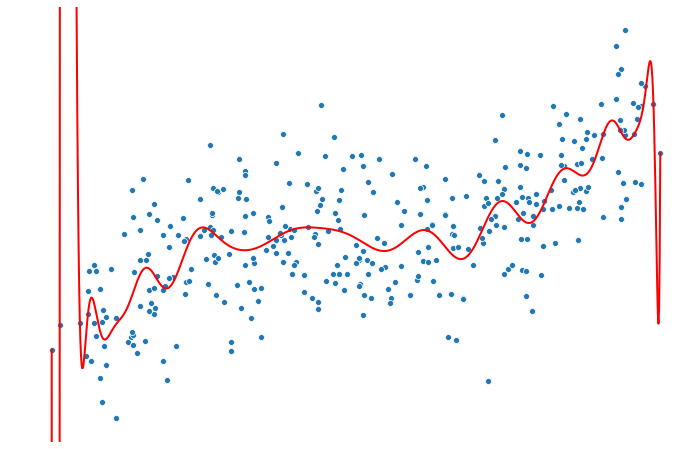

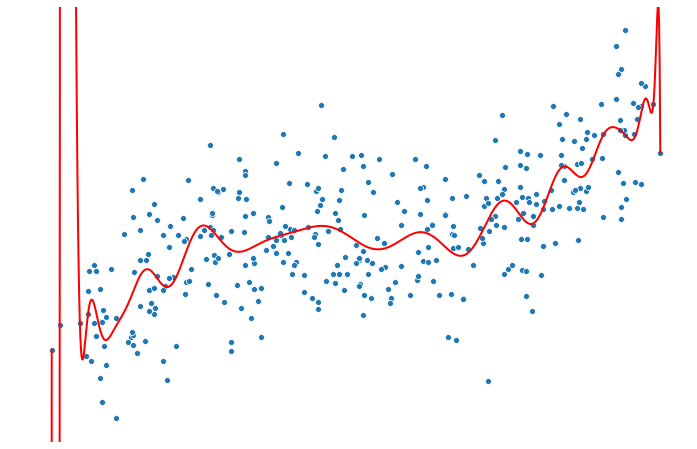

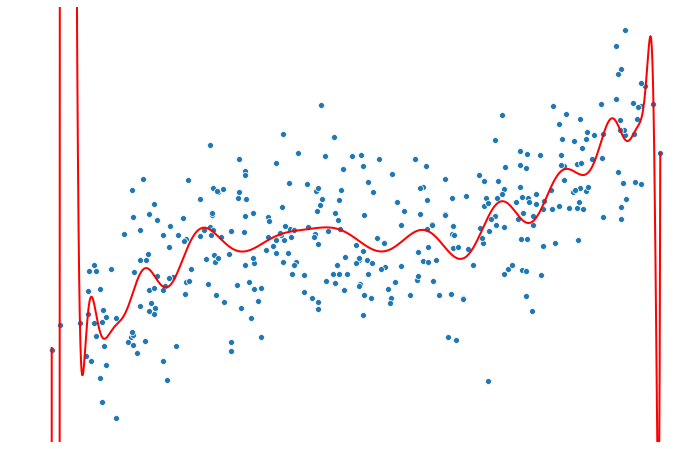

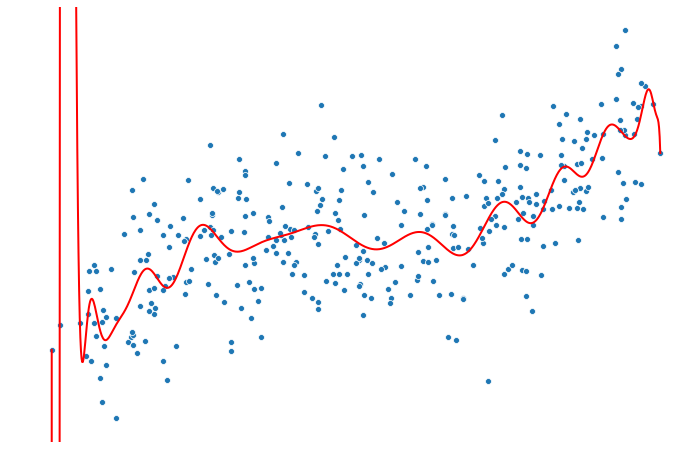

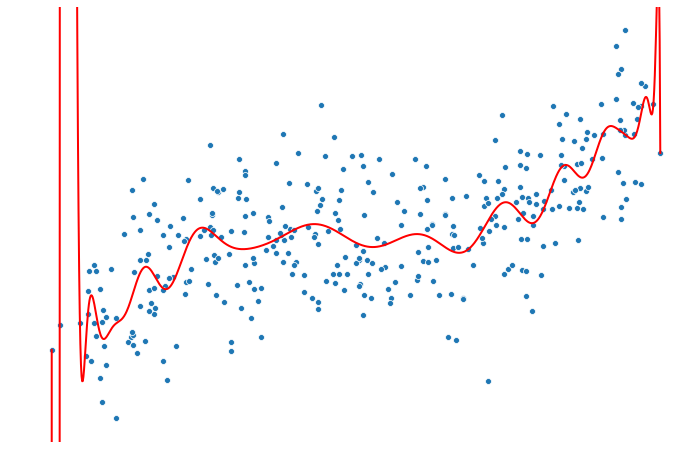

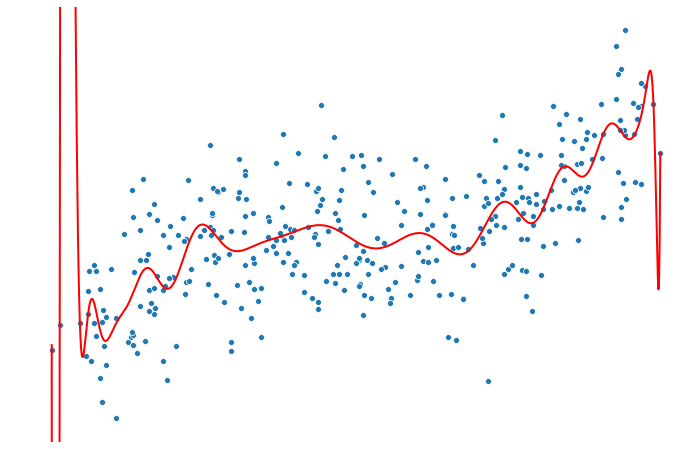

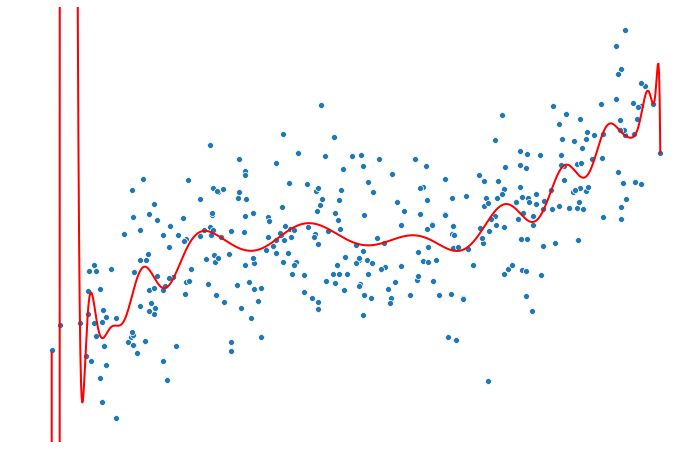

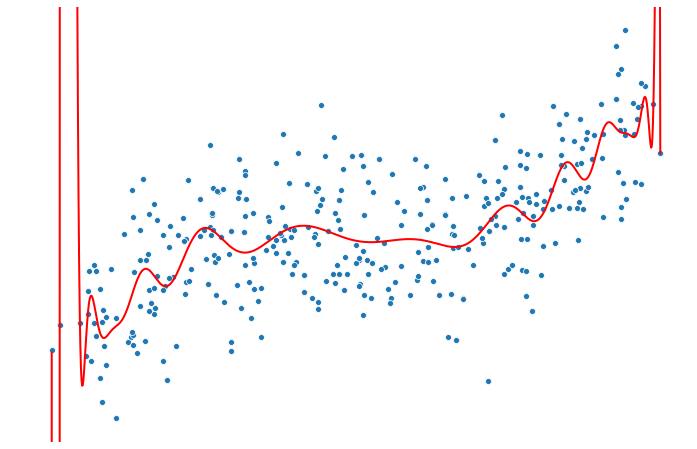

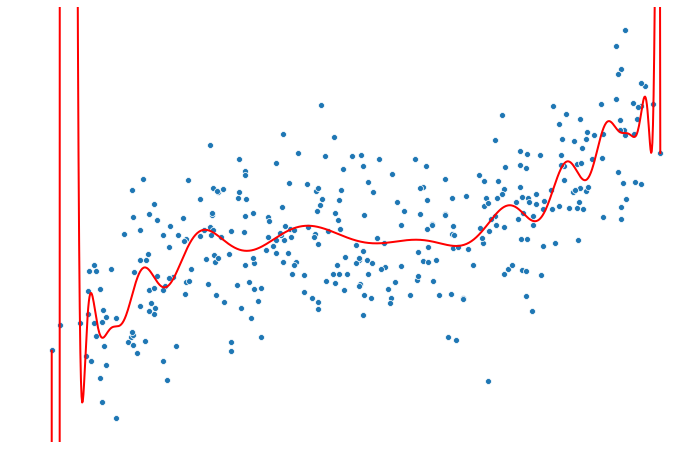

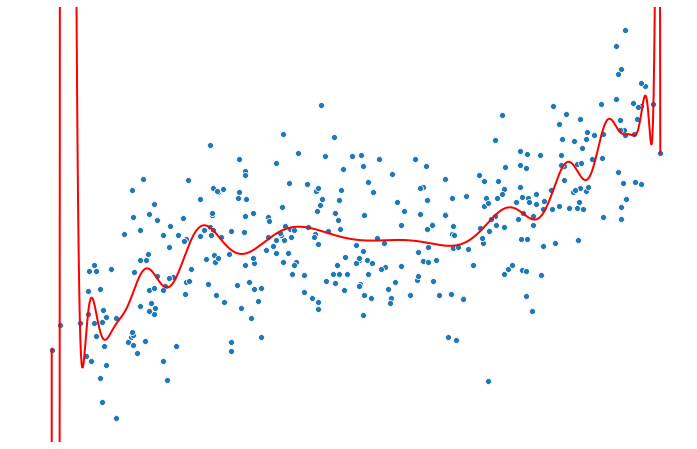

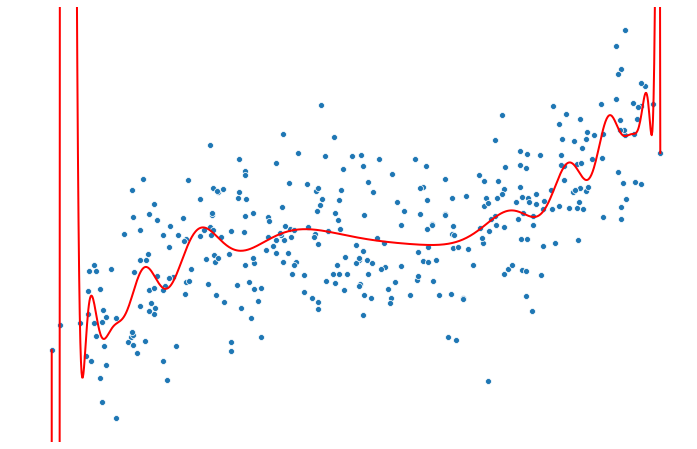

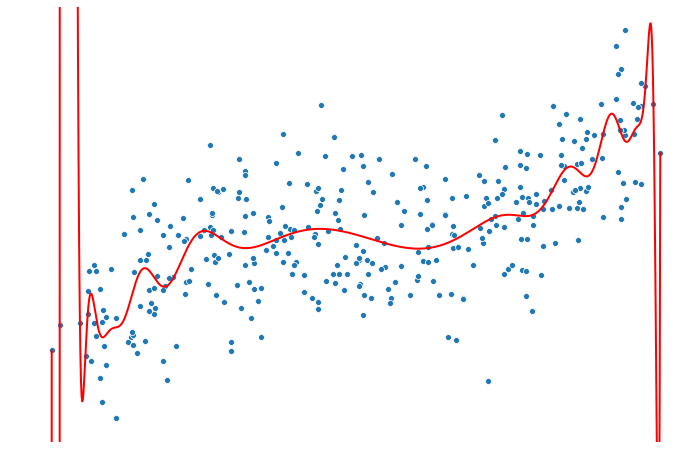

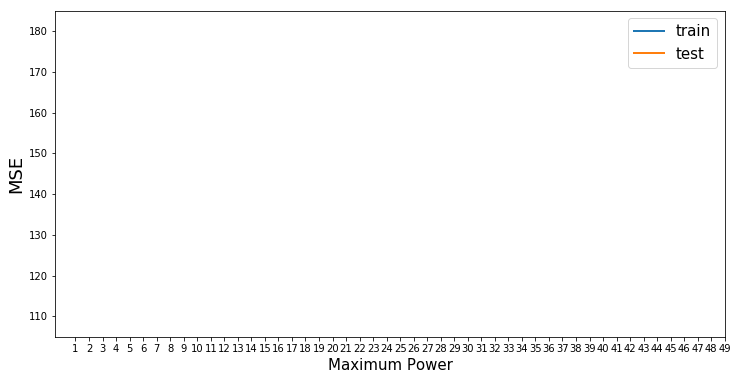

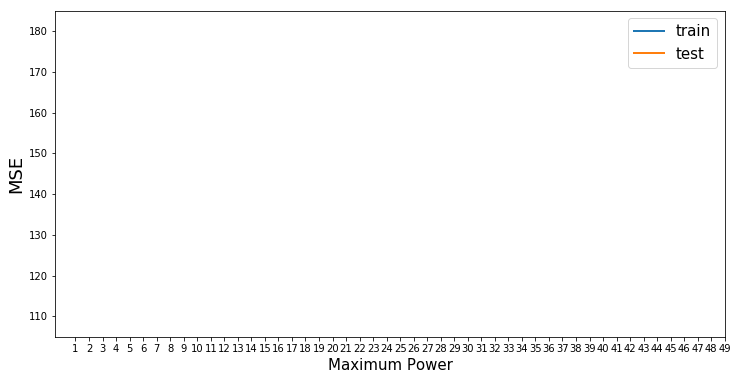

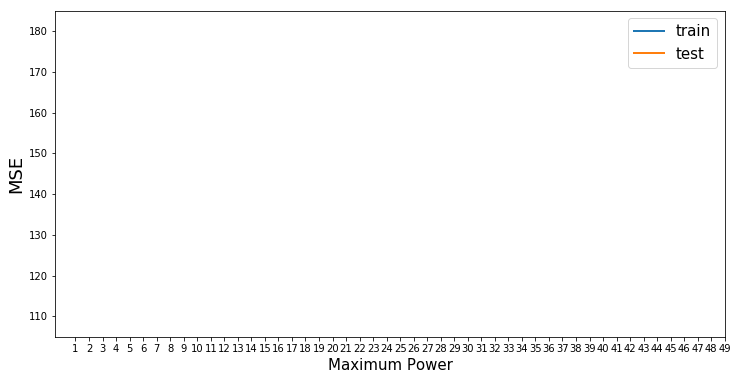

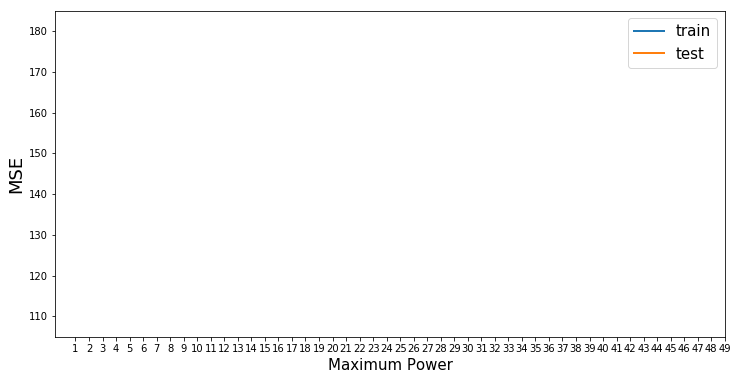

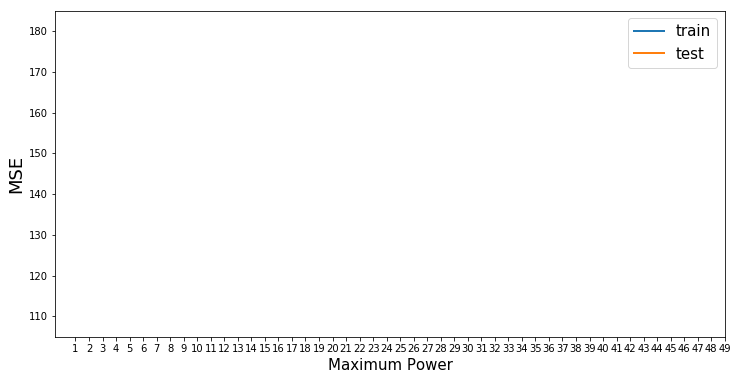

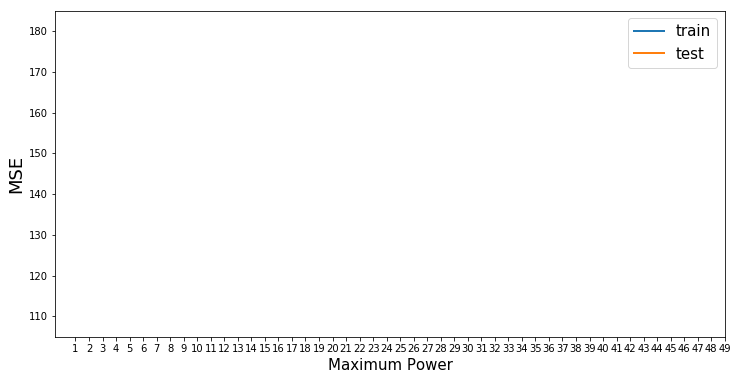

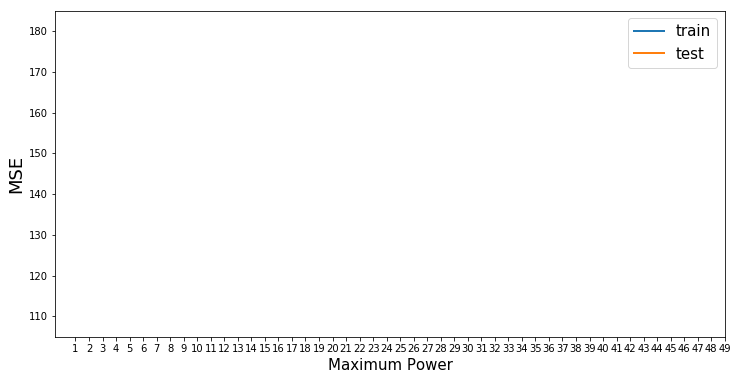

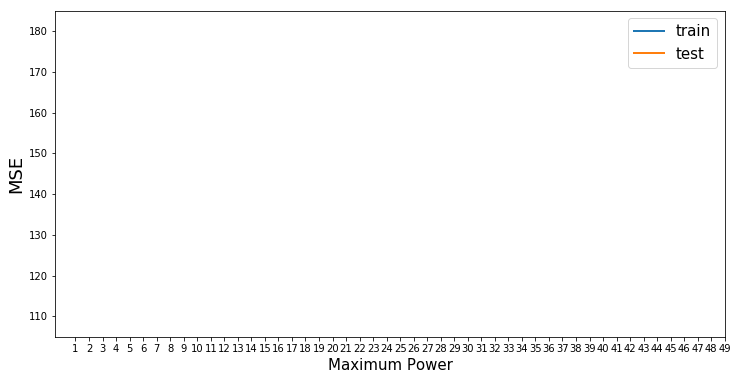

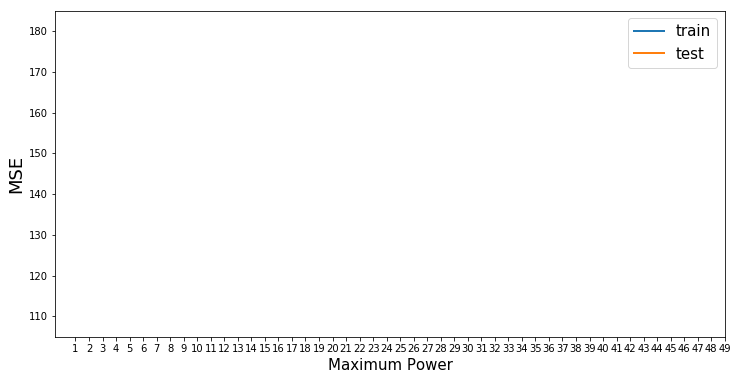

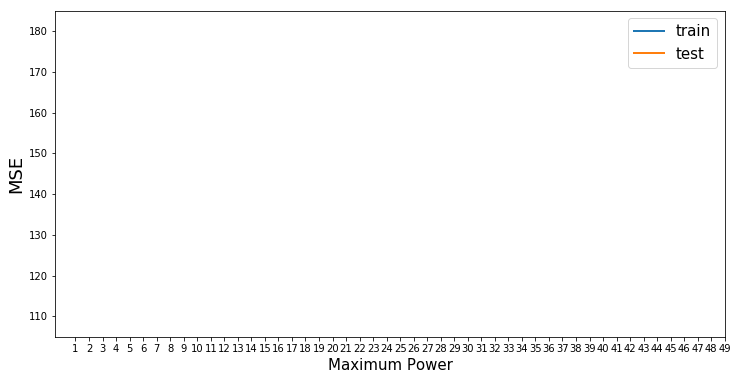

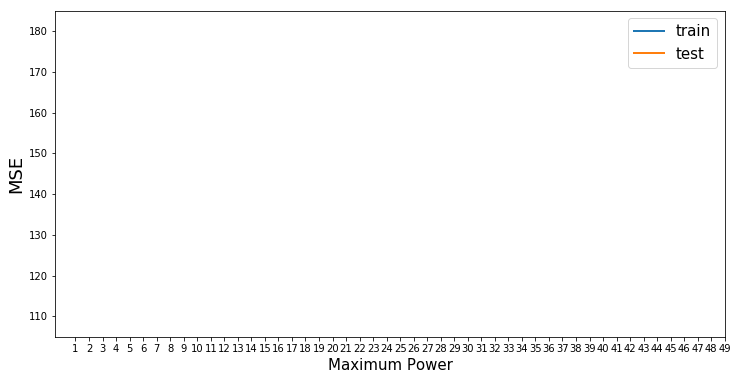

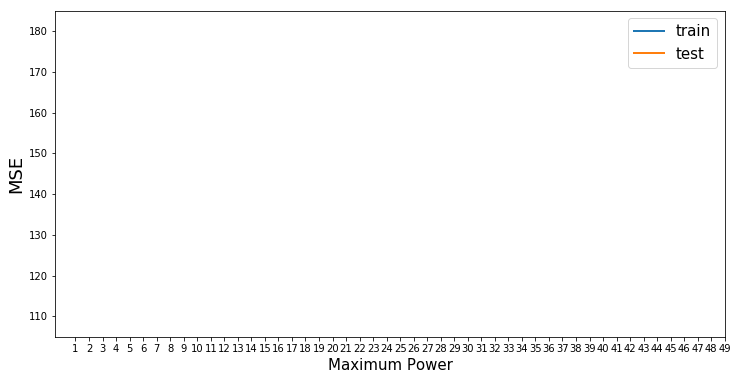

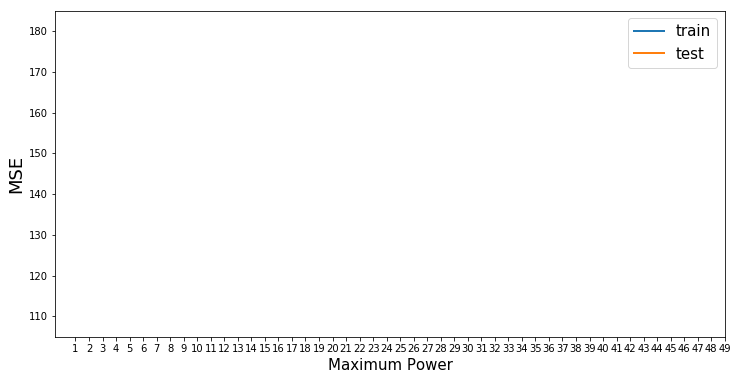

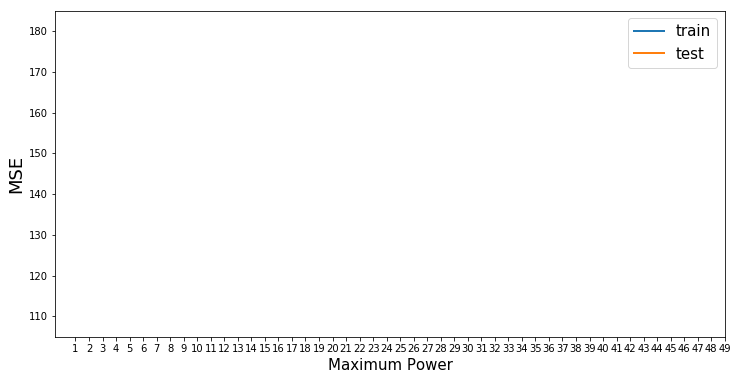

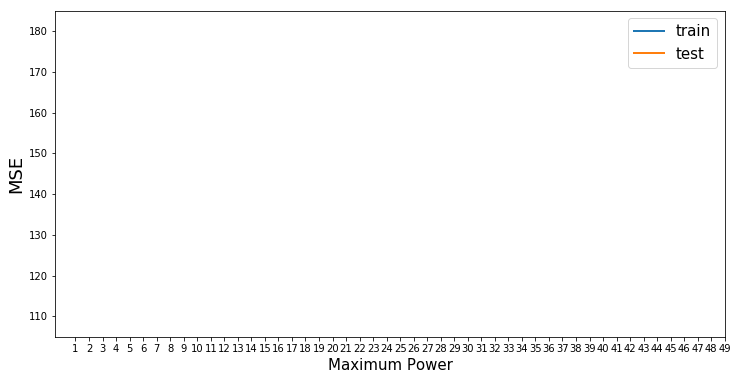

In [290]:
r=22
train = []
test = []
n = []
for i in range(1,50):
    model, train_mse, test_mse = regression(x,y,i,r)
    train.append(train_mse)
    test.append(test_mse)
    n.append(i)
    

for i in range(1,16):
    fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(12,6))
    plt.plot(n[0:i],train[0:i],label='train', lw=2)   
    plt.plot(n[0:i],test[0:i],label='test', lw=2)  

    plt.ylabel("MSE",size=18)
    plt.xlabel("Maximum Power",size=15)
    plt.xlim(-0.5,15.5)
    plt.ylim(105,185)
    plt.xticks(n)

    plt.legend(loc =1,prop={'size': 15})

    plt.savefig('../figures/poly/mse{}.png'.format(i),format='png',dpi=150)   

In [ ]:
data.to_csv('../data/house_price.csv')
data = pd.read_csv('../data/house_price.csv')